# 📚 <font color='indianred'>Analyse des données des systèmes éducatifs</font>


# <font color='DodgerBlue'> SOMMAIRE<font></a>


### <a href="#C1"><font color='DodgerBlue'>1. Missions & objectifs</a>

    
### <a href="#C2"><font color='DodgerBlue'>2. Description des jeux de données</a>
    
   - <a href="#C3"> 2.1 Fichier Country </a>
   - <a href="#C4"> 2.2 Fichier CountrySeries </a>
   - <a href="#C5"> 2.3 Fichier Footnote </a>
   - <a href="#C6"> 2.4 Fichier Series </a>
   - <a href="#C7"> 2.5 Fichier Data </a>
    
### <a href="#C8"><font color='DodgerBlue'>3. Préparation de données </a>
    
  - <a href="#C9"> 3.1 Identification des Indicateur Passés et Futurs </a>
  - <a href="#C10"> 3.2 Données futures </a>
  - <a href="#C11"> 3.3 Données passées </a>
 
### <a href="#C12"><font color='DodgerBlue'>4. Sélection des indicateurs pertinents </a>
       
#### <a href="#C13"><font color='RoyalBlue'>4.1 **Indicateur de connectivité à Internet:'IT.NET.USER.P2'**</a>
    
  - <a href="#C14">4.1.1 Descriptif statistique du dataframe</a>
  - <a href="#C15">4.1.2 Visualisation par région</a>
  - <a href="#C16">4.1.3 Visualisation par pays</a>
    
    
#### <a href="#C17"><font color='RoyalBlue'>4.2 **Indicateurs économiques ("PIB/Habitant") :'NY.GDP.PCAP.CD'**</a>
    
  - <a href="#C18">4.2.1 Visualisation par région</a>
  - <a href="#C19">4.2.2 Visualisation par pays</a>
       
#### <a href="#C20"><font color='RoyalBlue'>4.3 **Indicateurs de Population Etudiante:'UIS.E.3' et 'SE.TER.ENRL'**</a>
    
  - <a href="#C21"> 4.3.1 Visualisation par pays</a> 
  - <a href="#C22"> 4.3.2 Visualisation par region</a>
  - <a href="#C23"> 4.3.3 Merge des trois tables de pivot</a>
  
### <a href="#C24"><font color='DodgerBlue'> 5. Pondération et score d'attractivité</a>
    
  - <a href="#C25"> 5.1 Calcul du score par pays</a>
  - <a href="#C26"> 5.2 Distribution par région</a>
  - <a href="#C27"> 5.3 Pie plot de la répartition du potentiel par région</a>
    
### <a href="#C28"><font color='DodgerBlue'> 6. Etude des indicateurs de Projection</a>
    
 - <a href="#C29"> 6.1 Visualisation</a>
    
### <a href="#C28"><font color='DodgerBlue'> 7. Conclusion</a>    

## <a name="C1"><font color='DodgerBlue'>1. Missions & objectifs<font></a>

<font color='indianred'>**Academy**<font></a>

- Academy est notre entreprise, une start-up de la EdTech qui propose des **formations en ligne pour les lycéens et les enseignements supérieurs.**
- Dans le cadre de son expansion, elle souhaite **analyser les données de systèmes éducatifs de différents pays pour mieux cibler leurs futures implantations.**

<font color='indianred'>**Mission**<font></a>

- A partir des données de la Banque mondiale, réaliser une pré-analyse exploratoire permettant de répondre aux **interrogations suivantes :**

- **Quels sont les pays avec un fort potentiel de clients pour nos services ?**
- **Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?**
- **Dans quels pays l'entreprise doit-elle opérer en priorité ?**

<font color='indianred'>**Source**<font></a>

http://datatopics.worldbank.org/education/

<font color='indianred'>**Cadre Stratégique pour l'Analyse de Données**<font></a>


- **Analyse des données (qualité, quantité, cohérence des données)**
- **sélection des indicateurs clés alignés avec nos objectifs de marché :**
- ---**Technologie et Accès à Internet:** accès à internet inidspensable pour les formations, la proprieté d'un ordinateur ou d'une tablette , l'accès à l'électricité...
- ---**Score** pour classer le potentiel des pays
- ---**Démographie et Taux de Croissance de la Population:** Population dans les tranches d'âge pertinentes (par exemple, 15-24 ans pour l'enseignement supérieur),taux de croissance de la population scolaire et universitaire,
- ---**Indicateurs Socio-Économiques :** vérifier les niveaux de vie de la population,dépenses en Éducation,taux de chômage chez les jeunes....
- ---**Prédictions**
- ---**Conclusions**

<font color='indianred'>**Pré-analyse exploratoire :**<font></a>
- Valider la qualité de ce jeu de données(comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données(nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique(quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde

<font color='indianred'>**Importation des librairies et chargement des données:**</a> 

In [577]:
# Chargement des librairies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.preprocessing import MinMaxScaler
import copy

# Versions 
print('Version des librairies utilisées :')
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
print('matplotlib    : ' + matplotlib.__version__)
print('Seaborn       : ' + sns.__version__)

Version des librairies utilisées :
NumPy         : 1.24.3
Pandas        : 2.0.3
matplotlib    : 3.7.2
Seaborn       : 0.12.2


In [578]:
#Chargement du jeu des données
country = pd.read_csv('EdStatsCountry.csv',sep=',')
countryseries = pd.read_csv('EdStatsCountry-Series.csv',sep=',')
data = pd.read_csv('EdStatsData.csv',sep=',' )
footnote = pd.read_csv('EdStatsFootNote.csv',sep=',')
series = pd.read_csv('EdStatsSeries.csv',sep=',')

## <a name="C2"><font color='DodgerBlue'>2. Description des jeux de données<font></a>

### <a name="C3"><font color='RoyalBlue'>**2.1 Fichier country**</a> 

- **Ce fichier contient les informations globales sur l’économie de chaque pays (et zones géographiques) du monde**

In [579]:
#Afficher les 3 premières lignes du dataframe
country.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [580]:
#Vérifier les différentes informations et voir quels variables contiennent des valeurs manquantes
country.info()
country.describe()#Affiche des statistiques basiques sur le fichier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

,National accounts reference year,Latest industrial data,Latest trade data,Unnamed: 31
count,32.00000,107.000000,185.000000,0.0
mean,2001.53125,2008.102804,2010.994595,NaN
std,5.24856,2.616834,2.569675,NaN
min,1987.00000,2000.000000,1995.000000,NaN
25%,1996.75000,2007.500000,2011.000000,NaN
50%,2002.00000,2009.000000,2012.000000,NaN
75%,2005.00000,2010.000000,2012.000000,NaN
max,2012.00000,2010.000000,2012.000000,NaN


In [581]:
# Taille : nombre de lignes/colonnes
nRow, nCol = country.shape
print(f'Le jeu de données contient {nRow} lignes et {nCol} colonnes.')

Le jeu de données contient 241 lignes et 32 colonnes.


<font color='indianred'>**Définition d'une fonction pour évaluer la qualité des données**</a> 

In [582]:
def decrire_dataframe(df: pd.DataFrame):
    """
    Retourner un dataframe avec des informations sur les colonnes d'un dataframe
    """
    desc = df.columns.to_frame(name="column").set_index('column') #construire le dataframe résultats
    desc['count'] = df.notnull().sum() #count de values non nulls
    desc['unique'] = df.nunique() # nombre de values unique
    desc['dtype'] = df.dtypes # type de données dans chque colonne
    desc['count_null']=df.isna().sum() #count de valeurs nulls
    desc['null%']=round((df.isna().sum()/df.shape[0]*100),2)
    desc['duplicated']=df.duplicated(keep=False).sum() # nombre de valeurs en doubles
    return desc

#Vérifier l'unicité de la clé primaire
#Creation d'une fonction qui teste l'unicité d'une colonne  

def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable',col, 'n\'est pas une clé primaire')

        
def is_zero(cell_value, color='pink'):
    """
    style pour souligné une valeur
    example use:
    df.style.applymap(is_zero,subset=["my_col"],color='red')
    """
    return f'background-color: {color};' if cell_value == 0 else None

In [583]:
#Appel à la fonction
(decrire_dataframe(country).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,Country Code,241,241,object,0,0.000000,0
1,Short Name,241,241,object,0,0.000000,0
2,Table Name,241,241,object,0,0.000000,0
3,Long Name,241,241,object,0,0.000000,0
4,2-alpha code,238,238,object,3,1.240000,0
5,Currency Unit,215,152,object,26,10.790000,0
6,Special Notes,145,131,object,96,39.830000,0
7,Region,214,7,object,27,11.200000,0
8,Income Group,214,5,object,27,11.200000,0
9,WB-2 code,240,240,object,1,0.410000,0


In [584]:
#Vérifier l'unicité de la clé primaire
cle_primaire(country,'Country Code')
cle_primaire(country,'Region')
print ("Nombre de valeurs uniques de la colonne Country Code = ",country["Country Code"].nunique())
print ("Nombre de valeurs uniques de la colonne Region = ",country["Region"].nunique())

La variable Country Code est une clé primaire
La variable Region n'est pas une clé primaire
Nombre de valeurs uniques de la colonne Country Code =  241
Nombre de valeurs uniques de la colonne Region =  7


In [585]:
#Affiche la liste des régions
country["Region"].dropna().unique() 

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

<font color='indianred'>**Pays / Régions / Groupes de revenus**</a> 

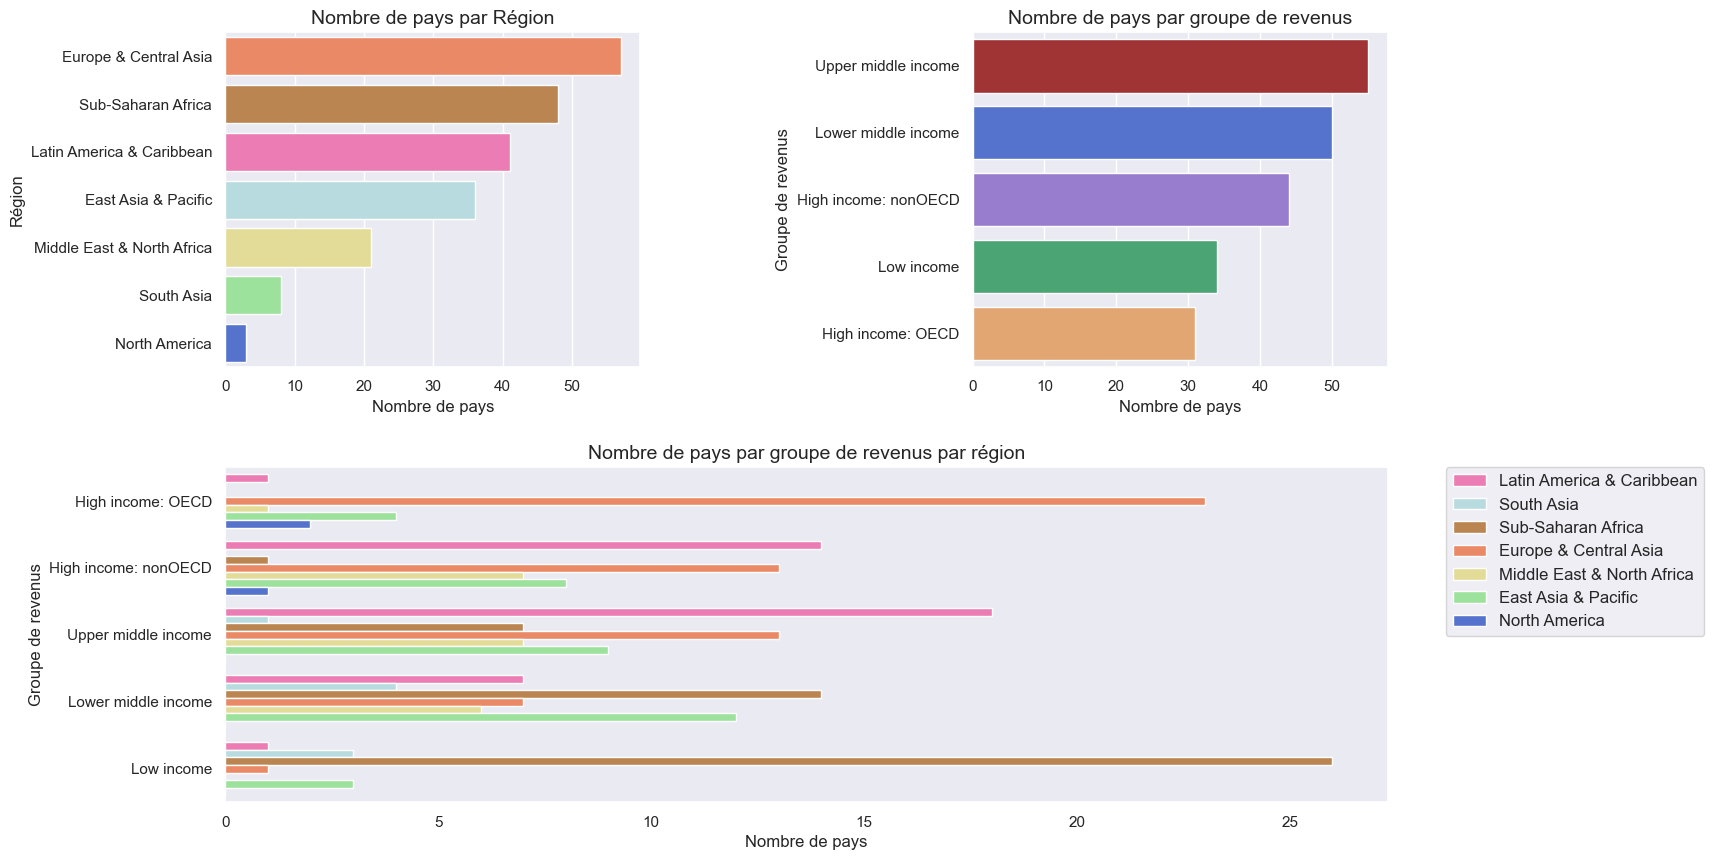

In [586]:
# Regroupement des pays par régions et par groupes de revenus

fig=plt.figure(figsize=(15,10))
grid = plt.GridSpec(2, 2, wspace=0.8, hspace=0.3)

# Graphique ligne 1, colonne 1 ------------------
plt.subplot(grid[0, 0])
# Regroupement des pays par régions
nb_pays_par_region=country.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)
colors = ['Coral','Peru','HotPink','PowderBlue','Khaki','LightGreen','RoyalBlue','Cyan']
sns.barplot(x=nb_pays_par_region['Short Name'].sort_values(), y=nb_pays_par_region['Region'], palette=colors)
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Région', fontsize=12)
plt.title('Nombre de pays par Région', fontsize=14)

# Graphique ligne 1, colonne 2 ------------------
plt.subplot(grid[0, 1])
# Regroupement des pays par groupe de revenus
nb_pays_par_groupe_revenu=country.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)
colors = ['FireBrick','RoyalBlue','MediumPurple','MediumSeaGreen','SandyBrown','Khaki']
sns.barplot(x=nb_pays_par_groupe_revenu['Short Name'].sort_values(),y= nb_pays_par_groupe_revenu['Income Group'], palette=colors)
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Groupe de revenus', fontsize=12)
plt.title('Nombre de pays par groupe de revenus', fontsize=14)

# Graphique ligne 2, sur les 2 colonnes ------------------
plt.subplot(grid[1, :])
# Regroupement des pays par region et par groupe de revenus
colors = ['HotPink','PowderBlue','Peru','Coral','Khaki','LightGreen','RoyalBlue','Cyan']
sns.countplot(y='Income Group', hue='Region', data=country, orient='h',
                   order=['High income: OECD', 'High income: nonOECD', 'Upper middle income', 'Lower middle income', 'Low income'],
                   palette=colors)
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Groupe de revenus', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.title('Nombre de pays par groupe de revenus par région', fontsize=14)
plt.grid(False)

plt.show()

- **La derniere visualisation nous permet de comparer le statut économique des pays à travers les différentes régions du monde.**

### <font color='royalblue'>Bilan sur le jeu de données EdStatsCountry.csv<font></a>

- **EdStatsCountry.csv contient les informations globales sur l’économie de chaque pays du monde (et zones géographiques).**
- **Le fichier "country" donne des informations générales sur chaque pays à savoir:**
- **( sa position geographique,devise, dette, année de dernier recensement,la dernière enquête auprès des ménages, etc.).** 
- **On n'y trouve pas d'information en rapport avec l'éducation et la formation.**
- **Taille: le fichier country presente 241 lignes, 32 colonne**
- **Les pays et zones géographiques sont répartis en 7 régions**
- **Certaines colonnes sont en float et contiennent des dates (années) : à transformer.**
- **La dernière colonne "Unnamed:31" est totalement vide avec des NaN partout,donc à supprimer.**
- **Beaucoup de valeurs NaN.**
- **Pas de doublons**


**Cependant, dans ce DF, seule la colonne 'Region' nous interesse afin de regrouper
les pays par région du monde lors de nos futures analyses et graphiques.**

### <a name="C4"><font color='RoyalBlue'>**Fichier countryseries**</a> 

- **EdStatsCountry-Series.csv contient la source des données des informations contenues dans EdStatsCountry.csv**

In [587]:
#Afficher les 3 premières lignes du dataframe
countryseries.head(2)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [588]:
#Vérifier les différentes informations et voir quels variables contiennent des valeurs manquantes
countryseries.info()
countryseries.describe()#Affiche des statistiques basiques sur le fichier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


,Unnamed: 3
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [589]:
# Taille : nombre de lignes/colonnes
nRow, nCol = countryseries.shape
print(f'Le jeu de données contient {nRow} lignes et {nCol} colonnes.')

Le jeu de données contient 613 lignes et 4 colonnes.


In [590]:
#Appel à la fonction définie
(decrire_dataframe(countryseries).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,CountryCode,613,211,object,0,0.000000,0
1,SeriesCode,613,21,object,0,0.000000,0
2,DESCRIPTION,613,97,object,0,0.000000,0
3,Unnamed: 3,0,0,float64,613,100.000000,0


In [591]:
#Vérifier l'unicité de la clé primaire
cle_primaire(countryseries,'CountryCode')
cle_primaire(countryseries,'SeriesCode')
print ("Nombre de valeurs uniques de la colonne CountryCode = ",countryseries["CountryCode"].nunique())
print ("Nombre de valeurs uniques de la colonne SeriesCode = ",countryseries["SeriesCode"].nunique())

La variable CountryCode n'est pas une clé primaire
La variable SeriesCode n'est pas une clé primaire
Nombre de valeurs uniques de la colonne CountryCode =  211
Nombre de valeurs uniques de la colonne SeriesCode =  21


- **On ne retrouve pas le même nombre de pays dans countryseries que dans country. Quels sont les pays qui diffèrent?**
- **Pays présents dans EdStatsCountry.csv mais pas dans ce jeu de données EdStatsCountry-Series.csv**

In [592]:
# Verifions le nombre des pays dans deux datasets
country['Country Code'].nunique() == countryseries['CountryCode'].nunique()

False

In [593]:
# Recherche des noms des pays qui n'apparaissant pas dans le jeu de données EdStatsCountry-Series.csv
country[~country['Country Code'].isin(countryseries['CountryCode'].unique())][['Short Name']].sort_values(by = 'Short Name')

,Short Name
5,Arab World
47,Curaçao
58,East Asia & Pacific (all income levels)
57,East Asia & Pacific (developing only)
63,Euro area
60,Europe & Central Asia (all income levels)
59,Europe & Central Asia (developing only)
68,European Union
92,Heavily indebted poor countries (HIPC)
89,High income


**Les pays qui appartiennent en plus dans le jeu de données EdStatsCountry.csv sont :**

- **Des noms de régions géopolitiques("Arab World" et "Sub-Saharan Africa"),**
- **Des groupements selon les niveaux de revenu(comme "High income", "Low & middle income"),**
- **Des regroupements spécifiques de pays selon des critères comme l'union politique ou économique ("European Union"),**
- **D'autres pays individuels ("Curaçao", "Nauru").**

<font color='indianred'>**Pays / Code indicateur / Description**</a> 

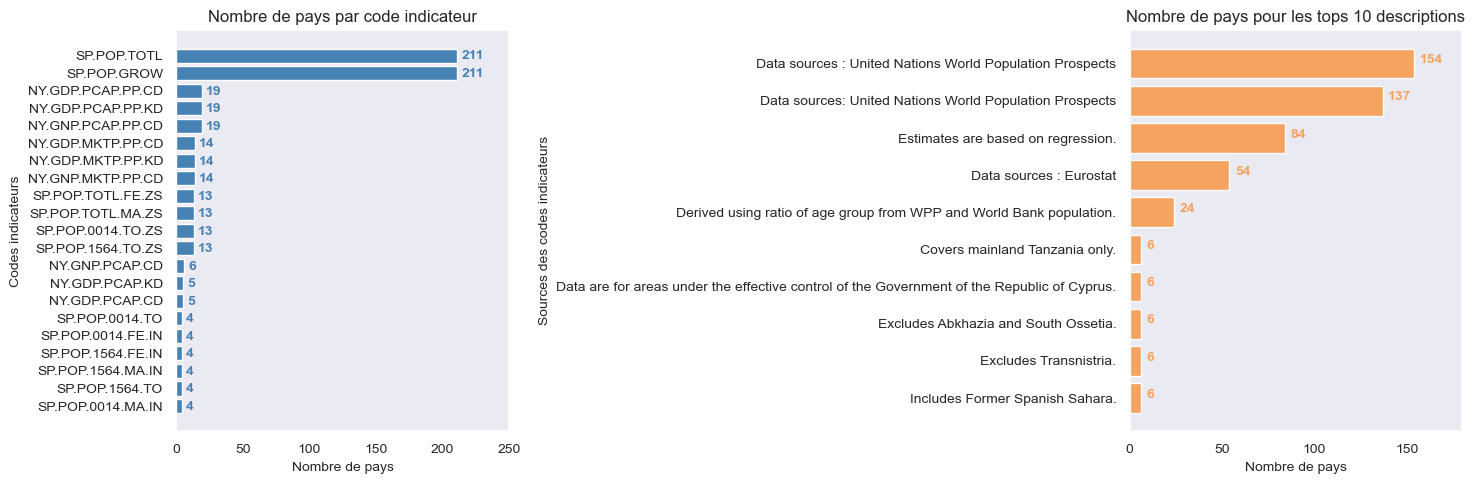

In [594]:
# Regroupement des pays par "code indicateur (SeriesCode)"" et par "description" de ces indicateurs

fig, ax = plt.subplots(1, 2, figsize=(15, 5))  

# Graphique ligne 1, colonne 1 ------------------
# Regroupement des pays par "code indicateur"
serie_code = countryseries.groupby('SeriesCode')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['SeriesCode']
nb_pays_par_serie_code=countryseries.groupby('SeriesCode')[['CountryCode']].count()['CountryCode'].sort_values()
ax1=ax[0]
ax1.barh(y = serie_code, width=nb_pays_par_serie_code, color='SteelBlue')
for i, v in enumerate(nb_pays_par_serie_code):
    ax1.text(v + 3, i - .22, str(v), color='SteelBlue', fontsize=10, fontweight='bold')
ax1.set_title('Nombre de pays par code indicateur', fontsize=12)
ax1.set_xlabel('Nombre de pays', fontsize=10)
ax1.set_ylabel('Codes indicateurs', fontsize=10)
ax1.tick_params(labelsize=10)
ax1.set_xlim([0, 250])
ax1.grid(False)

# Graphique ligne 1, colonne 2 ------------------
# Regroupement des pays par les 10 descriptions des sources des indicateurs
description = countryseries.groupby('DESCRIPTION')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['DESCRIPTION'].tail(10)
nb_pays_par_description=countryseries.groupby('DESCRIPTION')[['CountryCode']].count()['CountryCode'].sort_values().tail(10)
ax2=ax[1]
ax2.barh(y = description, width=nb_pays_par_description, color='SandyBrown')
for i, v in enumerate(nb_pays_par_description):
    ax2.text(v + 3, i + .01, str(v), color='SandyBrown', fontsize=10, fontweight='bold')
ax2.set_title('Nombre de pays pour les tops 10 descriptions', fontsize=12)
ax2.set_xlabel('Nombre de pays', fontsize=10)
ax2.set_ylabel('Sources des codes indicateurs', fontsize=10)
ax2.tick_params(labelsize=10)
ax2.set_xlim([0, 180])
ax2.grid(False)

fig.tight_layout()
plt.show()

- **Les deux graphiques montrent les indicateurs les plus couramment rapportés dans un ensemble de données lié aux pays et aux séries statistiques.**

### <font color='royalblue'>Bilan sur le jeu de données EdStatsCountry-Series.csv<font></a>

- **Le jeu de données contient les références des sources de certains indicateurs par pays présents dans le jeu de données EdStatsCountry.csv.**
- **Le jeu de données contient 613 lignes et 4 colonnes.**
- **Les pays en plus (241 dans EdStatsCountry.csv et de 211 dans le jeu de données EdStatsCountry-Series.csv) sont des noms de région ou de regroupement de revenus ou certains regroupement de pays (European Union, Arab world..) et certains pays devenus autonomes (Curaçao).**
- **Nombre de valeurs manquantes totales :les 3 premières colonnes ('Country Code', 'Serie Code' et 'Description') ne presentent pas de valeurs manquantes.**
- **Pas de doublons**
- **La dernière variables Unnamed: 3 est entièrement vide, inexploitable donc à nettoyer.**

### <a name="C5"><font color='RoyalBlue'>**Fichier footnote**</a> 

- **EdStatsFootNote.csv contient des informations supplémentaires sur l'année d'origine et l'incertitude des indicateurs par pays**

In [595]:
#Afficher les 3 premières lignes du dataframe
footnote.head(2)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN


In [596]:
#Vérifier les différentes informations et voir quels variables contiennent des valeurs manquantes
footnote.info()
footnote.describe()#Affiche des statistiques basiques sur le fichier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


,Unnamed: 4
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [597]:
# Taille : nombre de lignes/colonnes
nRow, nCol = footnote.shape
print(f'Le jeu de données contient {nRow} lignes et {nCol} colonnes.')

Le jeu de données contient 643638 lignes et 5 colonnes.


In [598]:
#Appel à la fonction définie
(decrire_dataframe(footnote).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,CountryCode,643638,239,object,0,0.000000,0
1,SeriesCode,643638,1558,object,0,0.000000,0
2,Year,643638,56,object,0,0.000000,0
3,DESCRIPTION,643638,9102,object,0,0.000000,0
4,Unnamed: 4,0,0,float64,643638,100.000000,0


In [599]:
#Vérifier l'unicité de la clé primaire
cle_primaire(footnote,'CountryCode')
cle_primaire(footnote,'SeriesCode')
print ("Nombre de valeurs uniques de la colonne CountryCode = ",footnote["CountryCode"].nunique())
print ("Nombre de valeurs uniques de la colonne SeriesCode = ",footnote["SeriesCode"].nunique())

La variable CountryCode n'est pas une clé primaire
La variable SeriesCode n'est pas une clé primaire
Nombre de valeurs uniques de la colonne CountryCode =  239
Nombre de valeurs uniques de la colonne SeriesCode =  1558


- **On ne retrouve pas le même nombre de pays dans countryseries que dans country. Quels sont les pays qui diffèrent?**
- **Pays présents dans EdStatsCountry.csv mais pas dans ce jeu de données EdStatsCountry-Series.csv**

In [600]:
# Verifions le nombre des pays dans deux datasets
country['Country Code'].nunique() == footnote['CountryCode'].nunique()

False

In [601]:
# Recherche des noms des pays qui n'apparaissant pas dans le jeu de données EdStatsCountry-Series.csv
country[~country['Country Code'].isin(footnote['CountryCode'].unique())][['Short Name']].sort_values(by = 'Short Name')

,Short Name
85,Greenland
207,Sint Maarten (Dutch part)
134,St. Martin (French part)


- **Les pays qui appartiennent en plus dans le jeu de données EdStatsCountry.csv sont des noms des pays devenus autonomes (Saint Martin, Greenland).**

</a> <font color='indianred'>**Pays / Code indicateur / Description / Nombre de pays avec des mises à jour d'indicateur par années**</a> 

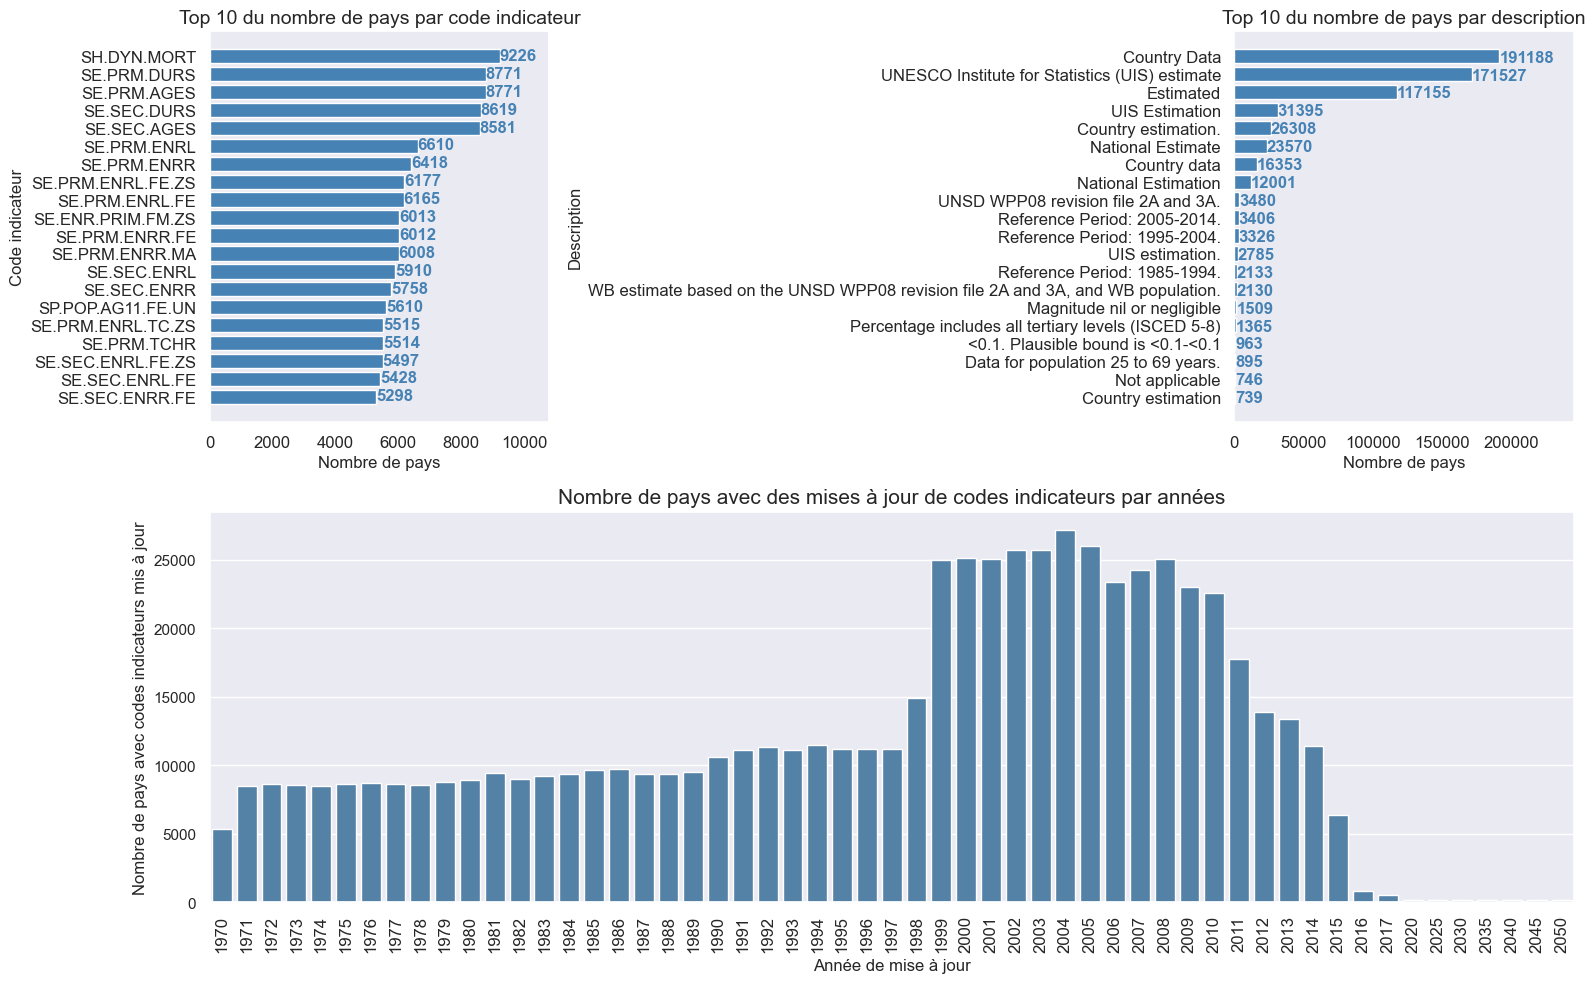

In [602]:
# Regroupement des pays par code indicateur et des pays par description et par mises a jours des indicateurs par annéé

plt.figure(figsize=(16, 10))
G = gridspec.GridSpec(2, 2)

# Graphique ligne 1, colonne 1 ------------------
ax1 = plt.subplot(G[0, 0])
# Top 10 du nombre de pays par code indicateur
serie_code = footnote.groupby('SeriesCode')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['SeriesCode'].tail(20)
nb_pays_par_serie_code=footnote.groupby('SeriesCode')[['CountryCode']].count()['CountryCode'].sort_values().tail(20)
ax1.barh(y = serie_code, width=nb_pays_par_serie_code,color='SteelBlue')
for i, v in enumerate(nb_pays_par_serie_code):
    ax1.text(v + 3, i - .2, str(v), color='SteelBlue', fontweight='bold', fontsize='12')
ax1.set_title('Top 10 du nombre de pays par code indicateur', fontsize=14)
ax1.set_xlabel('Nombre de pays', fontsize='12')
ax1.set_ylabel('Code indicateur', fontsize='12')
ax1.tick_params(labelsize=12)
ax1.grid(False)
ax1.set_xlim([0, 10800])

# Graphique ligne 1, colonne 2 ------------------
ax2 = plt.subplot(G[0, 1])
# Top 10 du nombre de pays par description
description = footnote.groupby('DESCRIPTION')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['DESCRIPTION'].tail(20)
nb_pays_par_description=footnote.groupby('DESCRIPTION')[['CountryCode']].count()['CountryCode'].sort_values().tail(20)
ax2.barh(y = description, width=nb_pays_par_description, color='SteelBlue')
for i, v in enumerate(nb_pays_par_description):
    ax2.text(v + 10, i - .3, str(v), color='SteelBlue', fontweight='bold', fontsize='12')
ax2.set_title('Top 10 du nombre de pays par description', fontsize='14')
ax2.set_xlabel('Nombre de pays', fontsize='12')
ax2.set_ylabel('Description', fontsize='12')
ax2.tick_params(labelsize=12)
ax2.grid(False)
ax2.set_xlim([0, 245000])

# Graphique ligne 2, sur les 2 colonnes ------------------
ax3 = plt.subplot(G[1, :])
# Pour plus de lisibilité, transformer par exemple 'YR2001' en '2001'
footnote['Annee']=[row[-4:] for row in footnote['Year']]
# Nombre de pays avec des mises à jour d'indicateur par années
ax3.set_title('Nombre de pays avec des mises à jour de codes indicateurs par années', size=15)
ax3 = sns.barplot(y = 'CountryCode', x='Annee', data = footnote.groupby('Annee').count().reset_index(), color='SteelBlue')
ax3.set_xticklabels(labels = footnote.groupby('Annee').count().reset_index()['Annee'], rotation=90, size=12)
ax3.set_xlabel('Année de mise à jour')
ax3.set_ylabel('Nombre de pays avec codes indicateurs mis à jour')

plt.tight_layout()
plt.show()

- **Les deux premiers graphiques nous montre les op 10 du nombre de pays par description et par code indicateur,le troisieme graphique nous montre le nombre de mise à jour des indicateurs.Ce derniers étaient stables jusqu'en 1990, ont légèrement augmenté jusqu'en 1997, ont fortement crû jusqu'en 2013, puis ont considérablement diminué, avec une absence remarquée après 2020.**

### <font color='royalblue'>Bilan sur le jeu de données EdStatsFootNote.csv<font></a>

- **Le jeu de données contient les années de références de mises à jour des indicateurs par pays et la description des incertitudes.**
- **Le jeu de données contient 643638 lignes et 5 colonnes.**
- **La variable "Unnamed:4" est vide avec des NAN partout, elle pourra être supprimée si le jeu de donnée est utilisé.**
- **Nombre de valeurs manquantes totales :les 4 premières colonnes ('CountryCode', 'SeriesCode', 'Year' et 'DESRIPTION') ne présentent pas de valeurs manquantes.**
- **Les pays non présents dans le jeu de données EdStatsFootNote.csv mais présents dans le jeu de données EdStatsCountry-Series.csv sont :** 
- **Saint Martin,Groenland.**

### <a name="C6"><font color='RoyalBlue'>**Fichier Series**</a>

- **EdStatsSeries.csv contient des informations géographiques sur les pays par régions,donneés économiques globales et dates de référence**

In [603]:
#Afficher les 3 premières lignes du dataframe
series.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [604]:
#Vérifier les différentes informations et voir quels variables contiennent des valeurs manquantes
series.info()
series.describe()#Affiche des statistiques basiques sur le fichier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

,Unit of measure,Notes from original source,Other web links,Related indicators,License Type,Unnamed: 20
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [605]:
# Taille : nombre de lignes/colonnes
nRow, nCol = series.shape
print(f'Le jeu de données contient {nRow} lignes et {nCol} colonnes.')

Le jeu de données contient 3665 lignes et 21 colonnes.


In [606]:
#Appel à la fonction définie
(decrire_dataframe(series).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,Series Code,3665,3665,object,0,0.000000,0
1,Topic,3665,37,object,0,0.000000,0
2,Indicator Name,3665,3665,object,0,0.000000,0
3,Short definition,2156,1169,object,1509,41.170000,0
4,Long definition,3665,2060,object,0,0.000000,0
5,Unit of measure,0,0,float64,3665,100.000000,0
6,Periodicity,99,1,object,3566,97.300000,0
7,Base Period,314,4,object,3351,91.430000,0
8,Other notes,552,14,object,3113,84.940000,0
9,Aggregation method,47,3,object,3618,98.720000,0


In [607]:
#Vérifier l'unicité de la clé primaire
cle_primaire(series,'Topic')
cle_primaire(series,'Series Code')
print ("Nombre de valeurs uniques de la colonne Topic = ",series["Topic"].nunique())
print ("Nombre de valeurs uniques de la colonne Series Code = ",series["Series Code"].nunique())

La variable Topic n'est pas une clé primaire
La variable Series Code est une clé primaire
Nombre de valeurs uniques de la colonne Topic =  37
Nombre de valeurs uniques de la colonne Series Code =  3665


In [608]:
#Afficher la liste des Topics
unique=series['Topic'].nunique()
print(f'{unique} thèmes regroupant les indicateurs')

37 thèmes regroupant les indicateurs


</a> <font color='indianred'>**Pays / Code indicateur / Topic**</a> 

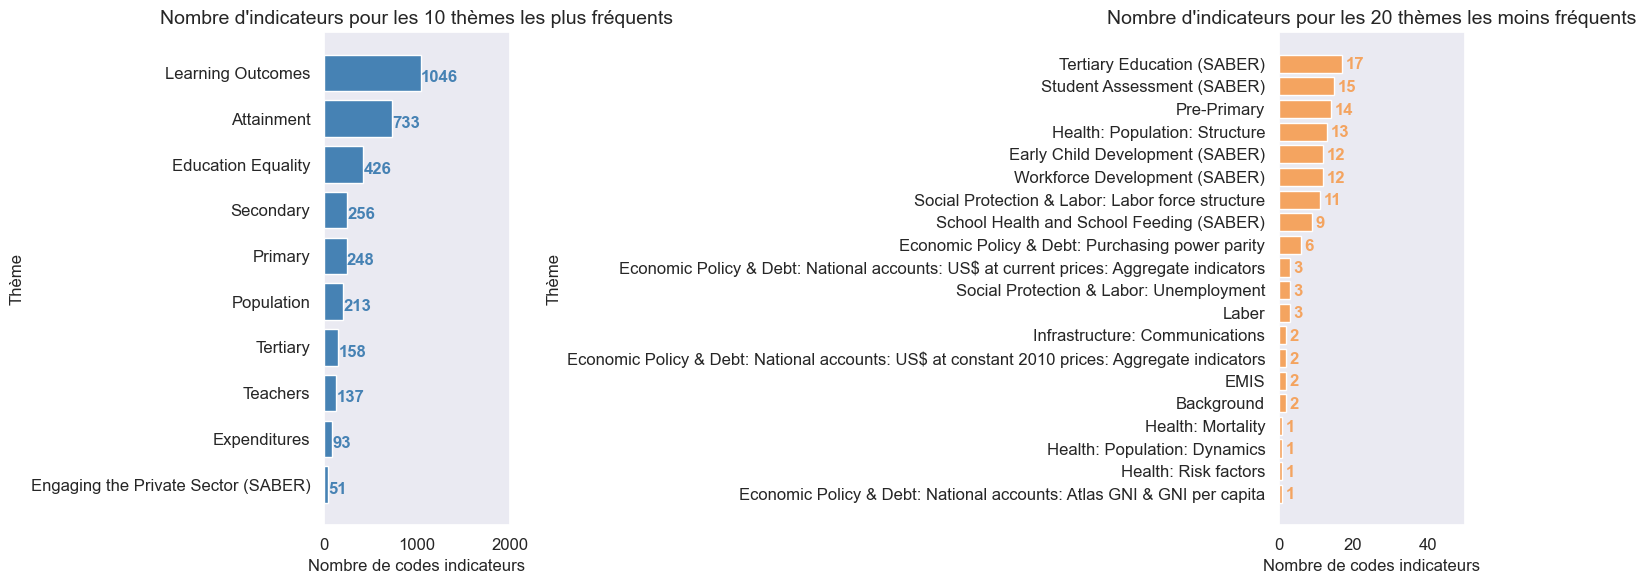

In [609]:
# Regroupement des pays par code indicateur et des pays par description

fig, ax = plt.subplots(1, 2, figsize=(15, 6))  

# Graphique ligne 1, colonne 1 ------------------
# Top 10 des thèmes les plus fréquents 
theme = series.groupby('Topic')[['Series Code']].count().reset_index().sort_values(by='Series Code')['Topic'].tail(10)
nb_code_par_theme=series.groupby('Topic')[['Series Code']].count()['Series Code'].sort_values().tail(10)
ax1=ax[0]
ax1.barh(y = theme, width=nb_code_par_theme, color='SteelBlue')
for i, v in enumerate(nb_code_par_theme):
    ax1.text(v + 3, i - .2, str(v), color='SteelBlue', fontweight='bold', fontsize=12)
ax1.set_title('Nombre d\'indicateurs pour les 10 thèmes les plus fréquents', fontsize=14)
ax1.set_xlabel('Nombre de codes indicateurs', fontsize=12)
ax1.set_ylabel('Thème', fontsize=12)
ax1.tick_params(labelsize=12)
ax1.grid(False)
ax1.set_xlim([0, 2000])

# Graphique ligne 1, colonne 2 ------------------
# les 10 thèmes les moins fréquents
theme_moins = series.groupby('Topic')[['Series Code']].count().reset_index().sort_values(by='Series Code')['Topic'].head(20)
nb_code_par_theme_moins=series.groupby('Topic')[['Series Code']].count()['Series Code'].sort_values().head(20)
ax2=ax[1]
ax2.barh(y = theme_moins, width=nb_code_par_theme_moins, color='SandyBrown')
for i, v in enumerate(nb_code_par_theme_moins):
    ax2.text(v + 1, i - .25, str(v), color='SandyBrown', fontweight='bold', fontsize=12)
ax2.set_title('Nombre d\'indicateurs pour les 20 thèmes les moins fréquents', fontsize=14)
ax2.set_xlabel('Nombre de codes indicateurs', fontsize=12)
ax2.set_ylabel('Thème', fontsize=12)
ax2.tick_params(labelsize=12)
ax2.grid(False)
ax2.set_xlim([0, 50])

fig.tight_layout()
plt.show()

- **Les graphiques suggèrent que certains domaines tels que les "Learning Outcomes" et "Attainment" dans le domaine de l'éducation sont largement suivis et ont de nombreux indicateurs, tandis que d'autres domaines, comme certains aspects de la politique économique et de la dette, sont moins couverts en termes de nombre d'indicateurs.**

### <font color='royalblue'>Bilan sur le jeu de données EdStatsSeries.csv<font></a>

- **Le jeu de données contient des informations sur les indicateurs regroupés par thème (Topics).**
- **Ce fichier nous donne des informations sur les indicateurs socio-éduco-économique classés en 37 thèmes**
- **Le jeu de données contient 3665 lignes et 21 colonnes.**
- **Beaucoup de valeurs NaN et certaines colonnes sont entièrement vides et la dernière colonne a un nom atypique "Unnamed:20" seront à supprimer**
- **Pas de doublons**
- **Il n'y a pas de changement de type à envisager.**

**Cependant, dans ce DF, seules les colonnes 'Series Code','Topic','Indicator Name' et'Long definition' nous intéressent afin de pouvoir sélectionner les 'Series Code' qu'il sera intéressant de sélectionner pour choisir nos Pays à potentiels.
De plus, ces colonnes sont correctement formatées et n'ont pas de valeur null.**

### <a name="C7"><font color='Royalblue'>**Fichier Data**</a> 

In [610]:
#Afficher les 3 premières lignes du dataframe
data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [611]:
#Vérifier les différentes informations et voir quels variables contiennent des valeurs manquantes
data.info()
data.describe()#Affiche des statistiques basiques sur le fichier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


In [612]:
# Taille : nombre de lignes/colonnes
nRow, nCol = data.shape
print(f'Le jeu de données contient {nRow} lignes et {nCol} colonnes.')

Le jeu de données contient 886930 lignes et 70 colonnes.


In [613]:
#Appel a la fonction
(decrire_dataframe(data).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,Country Name,886930,242,object,0,0.000000,0
1,Country Code,886930,242,object,0,0.000000,0
2,Indicator Name,886930,3665,object,0,0.000000,0
3,Indicator Code,886930,3665,object,0,0.000000,0
4,1970,72288,24595,float64,814642,91.850000,0
5,1971,35537,30892,float64,851393,95.990000,0
6,1972,35619,30982,float64,851311,95.980000,0
7,1973,35545,30988,float64,851385,95.990000,0
8,1974,35730,31139,float64,851200,95.970000,0
9,1975,87306,37838,float64,799624,90.160000,0


- **Les colonnes des années contiennent des données numériques (type 'float64'), avec un grand nombre de valeurs manquantes (indiqué par un pourcentage élevé dans la colonne 'null%').**
- **La variable Unnamed: 69 est vide et devra être supprimée.**
- **Pas de doublons**

In [614]:
#Vérifier l'unicité de la clé primaire
cle_primaire(data,'Country Code')
cle_primaire(data,'Indicator Code')
print ("Nombre de valeurs uniques de la colonne Country Code = ",data["Country Code"].nunique())
print ("Nombre de valeurs uniques de la colonne Indicator Code  = ",data["Indicator Code"].nunique())

La variable Country Code n'est pas une clé primaire
La variable Indicator Code n'est pas une clé primaire
Nombre de valeurs uniques de la colonne Country Code =  242
Nombre de valeurs uniques de la colonne Indicator Code  =  3665


- **On ne retrouve pas le même nombre de pays dans data que dans country et country-series. Quels sont les pays qui diffèrent?**
- **Pays présents dans EdStatsdata.csv mais pas dans ce jeu de données EdStatsCountry.csv et EdStatsCountry-Series**

In [615]:
# Verifions le nombre des pays dans deux datasets "data" et "country"
data['Country Code'].nunique() == country['Country Code'].nunique()

False

In [616]:
# Recherche des noms des pays qui n'apparaissant pas dans le jeu de données EdStatsCountry.csv
data_pays_plus=data[~data['Country Code'].isin(country['Country Code'])][['Country Name']]
data_pays_plus.drop_duplicates(inplace=True)
data_pays_plus

,Country Name
190580,British Virgin Islands


- **Le pays en plus dans le jeu de données EdStatsData.csv est 'British Virgin Islands'.**

In [617]:
# Verifions le nombre des pays dans deux datasets "data" et "country-series"
data['Country Code'].nunique() == countryseries['CountryCode'].nunique()

False

In [618]:
# Recherche des noms des pays qui n'apparaissant pas dans le jeu de données EdStatscountry-series.csv
data_pays_plus_=data[~data['Country Code'].isin(countryseries['CountryCode'])][['Country Name']].sort_values(by = 'Country Name')
data_pays_plus_.drop_duplicates(inplace=True)
data_pays_plus_

,Country Name
0,Arab World
193025,British Virgin Islands
278539,Curacao
4884,East Asia & Pacific
7330,East Asia & Pacific (excluding high income)
10996,Euro area
14661,Europe & Central Asia
21989,Europe & Central Asia (excluding high income)
23208,European Union
25656,Heavily indebted poor countries (HIPC)


**Les pays qui appartiennent en plus dans le jeu de données EdStatsdata.csv sont :**

- **Des noms de régions géopolitiques("Arab World" et "Sub-Saharan Africa"),**
- **Des groupements selon les niveaux de revenu(comme "High income", "Low & middle income"),**
- **Des regroupements spécifiques de pays selon des critères comme l'union politique ou économique ("European Union"),**
- **D'autres pays individuels ("Curaçao", "Nauru").**

<font color='indianred'>**Données / anneés / indicateurs**</a> 

Text(0.5, 1.0, 'Répartition du nombre de données par années')

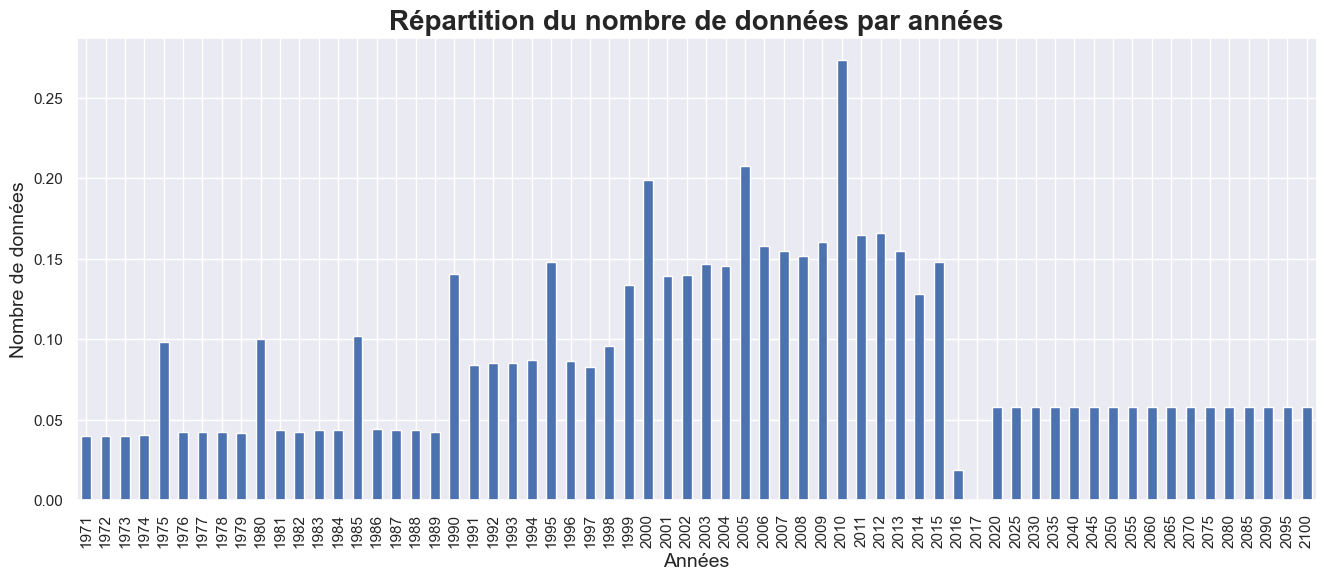

In [619]:
y = data.columns #Contient la liste de tous les noms de colonnes du fichier EdStatsData.csv
years = y[5:len(y)-1] #Contient uniquement les noms de colonnes représentant des années

sns.set(style="darkgrid")

(1 - data[years].isnull().mean()).plot.bar(figsize=(16,6))
plt.ylabel('Nombre de données',fontsize=14)
plt.xlabel('Années', fontsize=14)
plt.title('Répartition du nombre de données par années', fontsize=20, fontweight='bold')

- **On observe un pic de données tous les 5 ans.**
- **Les données sont doublées tous les 10 ans à partir de 1990.**
- **La dernière année exploitable est 2015.**
- **Les années 2020 à 2100 sont des années de prédiction.**
- **L'année 2017 contient moins de 2 % de variables, donc elle est inexploitable,à supprimer.**

### <font color='royalblue'>Bilan sur le jeu de données EdStatsdata.csv<font></a>

- **Le jeu de données contient des informations sur l'evolution des indicateurs ( au fil des années) par pays et certains groupes de pays(zones géographiques).**
- **Données depuis 1970 et projections jusqu'en 2100**
- **Les années 2020 à 2010 sont des années de prédictions non exploitables pour notre mission.**
- **L'année comportant le maximum de données est l'année 2010 mais avec 27% de données seulement**
- **L'année la moins renseignée est l'année 2017 (99,98% de valeurs manquantes) donc inexploitable.**
- **L'année 2015 est exploitable et est l'année la plus proche de l'année en cours (2024).**
- **242 valeurs uniques dans la colonne "Contry Name" ce qui laisserait penser que les données concerneraient 242 Pays.**
- **La variable 'Country Name' semble avoir des données autres que des noms de pays (des noms de région,ou des noms de regroupement de revenus,ou certains regroupement de pays (European Union, North America..)qui devront être nettoyées du jeu de données**
- **3665 indicateurs différents**
- **Le jeu de données contient 886930 lignes et 70 colonnes.**
- **Beaucoup de valeurs NaN**
- **Pas de doublons**
- **La dernière colonne est une colonne vide:"Unnamed:69",donc inexploitable,à supprimer.**
- **Il n'y a pas de changement de type à envisager.**
- **La colonne '2017' semble pratiquement vide et sera surement à supprimer.**

### <font color='royalblue'>Conclusions sur les jeux de données<font></a>

**La suite de l'analyse des données se focalisera sur 3 fichiers (ceux contenant les informations les plus utiles pour répondre à la problématique) à savoir:**


- **<font color='royalblue'>EdStatsData**: **contient des informatins sur l’évolution (au fil des années) de nombreux indicateurs pour tous les pays/zone.**
- **<font color='royalblue'>EdStatsCountry**: **contient informations globales sur l’économie de chaque pays/zone.**    
- **<font color='royalblue'>EdStatsSeries**: **contient des informations sur les indicateurs regroupés par sujets (topics).**

In [620]:
# Merge vers le DF 'data' de la colonne 'Region' du DF 'EdStatsCountry.csv' pour analyse par Continent.

data=data.merge(country[['Country Code','Region']], 
                  how='left', left_on='Country Code', right_on='Country Code')

In [621]:
# Merger la colonne 'Topic'au DF 'data' pour la suite de mon analyse.
#drop de la colonne 'Series Code' qui fait doublon avec 'Indicator Code'

data = data.merge(series[['Series Code','Topic']],
       how='left', left_on='Indicator Code', right_on='Series Code').drop('Series Code', axis = 1)
data.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Region,Topic
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secondary


**Les informations des colonnes 'Indicator Code' et 'Indicator Name'sont déjà présentes dans le DF 'data'.**

### <a name="C8"><font color='Dodgerblue'> 3. Préparation des données<font></a>
    
**Le jeu de données EdStatsData.csv comporte les indications chiffrées par année par indicateur par pays. Il constituera notre jeu de donnée de base.**
    
**Actions à effectuer :**

- Suppression des colonnes inutiles
- Réorganisation des colonnes
- Suppression des 'Indicator Code' genrés (MA,FE,...)
- Suppression des indicateur d'âge trop élevés

In [622]:
# Suppression des colonnes inutiles : 'Country Code','Indicator Name','Unnamed: 69'
data.drop(['Country Code','Indicator Name','Unnamed: 69'], axis=1, inplace=True)

In [623]:
# Réorganisation des colonnes

cols = data.columns.tolist()
print('Liste des colonnes avant réorganisation :\n{}'.format(cols))
cols = cols[0:1] + cols[-2:-1] + cols[1:2] + [cols[-1]] + \
       cols[cols.index('1970'):cols.index('2100')+1]
print('Liste des colonnes après réorganisation: \n{}'.format(cols))
data = data[cols]
data.tail(3)

Liste des colonnes avant réorganisation :
['Country Name', 'Indicator Code', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100', 'Region', 'Topic']
Liste des colonnes après réorganisation: 
['Country Name', 'Region', 'Indicator Code', 'Topic', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', 

,Country Name,Region,Indicator Code,Topic,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
886927,Zimbabwe,Sub-Saharan Africa,SE.ADT.1524.LT.FE.ZS,Literacy,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,Sub-Saharan Africa,SE.ADT.1524.LT.FM.ZS,Literacy,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886929,Zimbabwe,Sub-Saharan Africa,SE.ADT.1524.LT.MA.ZS,Literacy,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [624]:
# Suppression des 'Indicator Code' genrés :
# Suppression des indcateurs Contenant l'un des termes suivants : '.F','.M.','.FE.','.MA.'
# Se terminant par l'un des rtermes suivants : '.F','.M','.GPI','FE','MA','FE.ZS','MA.ZS'

# Suppression des indicator code genré F et M.
lenData = len(data)
print('Nombre de lignes dans le DF \'data\' : {}'.format(lenData))
data = data[~data['Indicator Code'].str.endswith(('.F','.M','.GPI',
                                    'FE','MA','FE.ZS','MA.ZS'))]
data = data[~data['Indicator Code'].str.contains("\.F\.|\.M\.|\.FE\.|\.MA\.", 
                                    regex=True)]
print('Nombre de lignes à supprimer : {}'.format(lenData-len(data)))
print('Nombre de lignes après traitement : {}'.format(len(data)))

Nombre de lignes dans le DF 'data' : 886930
Nombre de lignes à supprimer : 366872
Nombre de lignes après traitement : 520058


In [625]:
# Suppression des indicateur d'âge trop élevés (40 à 75 ans)

print('Nombre de lignes supprimées: {}'.format(data['Indicator Code'][data['Indicator Code'].str.\
contains('4044|4549|5054|5559|6064|6569|7074|75UP', regex=True)].count()))
data = data[~data['Indicator Code'].str.contains('4044|4549|5054|5559|6064|6569|7074|75UP', regex=True)]

Nombre de lignes supprimées: 23232


In [626]:
print('Liste des indicateurs à supprimer: \n{}'.format(data[data['Region'].isnull()]['Country Name'].unique()))
print('\nNombre de lignes avant traitement: {}'.format(len(data)))
data.dropna(subset=['Region'], inplace=True)
print('Nombre de lignes après traitement: {}'.format(len(data)))

Liste des indicateurs à supprimer: 
['Arab World' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'European Union' 'Heavily indebted poor countries (HIPC)' 'High income'
 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)' 'Middle income'
 'North America' 'OECD members' 'South Asia' 'Sub-Saharan Africa'
 'Sub-Saharan Africa (excluding high income)' 'Upper middle income'
 'World' 'British Virgin Islands' 'Gibraltar' 'Nauru']

Nombre de lignes avant traitement: 496826
Nombre de lignes après traitement: 439342


#### <a name="C9"><font color='RoyalBlue'>**3.1 Identification des Indicateur Passés et Futurs**</a> 

**L'objectif de cette étape est de distinguer les indicateurs qui se réfèrent à des événements passés de ceux qui anticipent des événements futurs**
**Ensuite je séparerai le DataFrame en 2 parties :**

- Un DataFrame contenant les indicateurs de projection uniquement
- Un DataFrame contenant les autres indicateurs

In [627]:
#Liste des 'Indicator Code' et 'Topic' pour lesquels les années (futures) 2020 et 2030 sont renseignées

data[['Indicator Code','Topic']][(data['2020'].notnull()) & (data['2030'].notnull())].groupby(['Indicator Code','Topic']).nunique()

,
Indicator Code,Topic
PRJ.ATT.1519.1.MF,Attainment
PRJ.ATT.1519.2.MF,Attainment
PRJ.ATT.1519.3.MF,Attainment
PRJ.ATT.1519.4.MF,Attainment
PRJ.ATT.1519.NED.MF,Attainment
PRJ.ATT.1519.S1.MF,Attainment
PRJ.ATT.15UP.1.MF,Attainment
PRJ.ATT.15UP.2.MF,Attainment
PRJ.ATT.15UP.3.MF,Attainment


**On remarque ici que l'ensemble des indicateurs futurs appartiennent au 'Topic' intitulé 'Attainment'et l'ensemble des 'Indicator Code' commencent par 'PRJ'.**

<font color='indianred'>**Visualisation du remplissage des indicateurs futur**</a>

In [628]:
# Ajuster le nombre de lignes à afficher
pd.set_option('display.max_rows', None)

projection_data_counts = data[data['Indicator Code'].str.startswith('PRJ')].loc[:, '1970':'2100'].count()
projection_data_counts

1970        0
1971        0
1972        0
1973        0
1974        0
1975        0
1976        0
1977        0
1978        0
1979        0
1980        0
1981        0
1982        0
1983        0
1984        0
1985        0
1986        0
1987        0
1988        0
1989        0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010    16932
2011        0
2012        0
2013        0
2014        0
2015    16928
2016        0
2017        0
2020    16932
2025    16932
2030    16932
2035    16932
2040    16932
2045    16932
2050    16932
2055    16932
2060    16932
2065    16932
2070    16932
2075    16932
2080    16932
2085    16932
2090    16932
2095    16932
2100    16932
dtype: int64

<font color='indianred'>**Séparation du DF 'data' entre les données passées et les données futures**</a>

- **Nous constatons que les années se suivent de 1970 à 2016 et qu'il y a une rupture entre 2016 et 2020. Ensuite, les années vont de 5 en 5 de 2020 à 2100.**

- **Nous pouvons donc en conclure que les données historiques vont de 1970 à 2016 et que les données prospectives vont de 2020 à 2100.**

- **Données futures :**

- Colonnes 'Country Name', 'Region', 'Indicator Code', 'Topic'
- Colonnes Année '2010', '2015' puis de '2020' à '2100'.
- 'Indicator Code' commence par 'PRJ'.

- **Données passées :**

- Colonnes 'Country Name', 'Region', 'Indicator Code', 'Topic'
- Colonnes Année de '1970' à '2016'.
- L'année 2017 ne sera jamais renseigné sur les indicateurs à analyser.
- 'Indicator Code' ne commence pas par 'PRJ.'.
- **Ajout de 2 colonnes grâce à la fonction personnalisée 'lastYearLastValue'**
- 'Année Dernière Valeur Non Null'
- 'Dernière Valeur Non Null'

#### <a name="C10"><font color='RoyalBlue'>**3.2 Données futures**</a>

In [629]:
# Création d'une liste contenant les colonnes à conserver
colsFutur = cols[:cols.index('Topic')+1] + ['2010'] + ['2015'] + cols[cols.index('2020'):]
# Création d'un nouveau DataFrame avec application des filtres
dataFutur = data[colsFutur][data['Indicator Code'].str.startswith('PRJ')]
dataFutur.tail()

,Country Name,Region,Indicator Code,Topic,2010,2015,2020,2025,2030,2035,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
886909,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.2.MF,Attainment,1406.20,1436.11,1452.30,1456.00,1406.09,1331.45,...,923.44,825.13,730.73,639.15,559.09,488.32,431.02,377.69,333.26,294.91
886912,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.NED.MF,Attainment,409.11,312.94,237.77,173.87,122.19,81.31,...,9.57,5.69,3.68,2.53,1.82,1.39,1.14,1.01,0.94,0.91
886915,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.4.MF,Attainment,304.50,370.12,448.51,528.76,614.27,706.31,...,1076.25,1166.47,1266.30,1374.29,1489.14,1611.78,1743.55,1886.91,2040.83,2202.47
886918,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.1.MF,Attainment,1614.84,1474.43,1360.77,1253.78,1124.63,995.32,...,574.00,494.23,420.47,352.09,294.10,244.68,205.47,171.39,144.86,124.17
886921,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.3.MF,Attainment,3010.47,3596.51,4207.33,4779.36,5296.82,5729.49,...,6558.41,6576.50,6572.10,6533.22,6469.39,6390.77,6303.34,6206.69,6100.56,5988.95


In [630]:
dataFutur['Taux de Remplissage'] = dataFutur.loc[:,'2010':'2100']\
          .notnull().sum(axis=1)/len(dataFutur.loc[:,'2010':'2100'].columns)
dataFutur.tail()

,Country Name,Region,Indicator Code,Topic,2010,2015,2020,2025,2030,2035,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Taux de Remplissage
886909,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.2.MF,Attainment,1406.20,1436.11,1452.30,1456.00,1406.09,1331.45,...,825.13,730.73,639.15,559.09,488.32,431.02,377.69,333.26,294.91,1.0
886912,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.NED.MF,Attainment,409.11,312.94,237.77,173.87,122.19,81.31,...,5.69,3.68,2.53,1.82,1.39,1.14,1.01,0.94,0.91,1.0
886915,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.4.MF,Attainment,304.50,370.12,448.51,528.76,614.27,706.31,...,1166.47,1266.30,1374.29,1489.14,1611.78,1743.55,1886.91,2040.83,2202.47,1.0
886918,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.1.MF,Attainment,1614.84,1474.43,1360.77,1253.78,1124.63,995.32,...,494.23,420.47,352.09,294.10,244.68,205.47,171.39,144.86,124.17,1.0
886921,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.3.MF,Attainment,3010.47,3596.51,4207.33,4779.36,5296.82,5729.49,...,6576.50,6572.10,6533.22,6469.39,6390.77,6303.34,6206.69,6100.56,5988.95,1.0


#### <a name="C11"><font color='RoyalBlue'>**3.3 Données passées**</a>

In [631]:
# Création d'une liste contenant les colonnes à conserver
colsPast = cols[:cols.index('2017')]
# Création d'un nouveau DataFrame avec application des filtres
dataPast = data[colsPast][~data['Indicator Code'].str.startswith('PRJ')]
dataPast.tail()

,Country Name,Region,Indicator Code,Topic,1970,1971,1972,1973,1974,1975,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
886613,Zimbabwe,Sub-Saharan Africa,SL.UEM.TOTL.ZS,Social Protection & Labor: Unemployment,NaN,NaN,NaN,NaN,NaN,NaN,...,5.5,5.4,5.5,6.2,5.40000,5.3,5.2,5.10000,5.1,5.2
886922,Zimbabwe,Sub-Saharan Africa,UIS.LPP.AG15T24,Literacy,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,43.61436,NaN,NaN,35.88710,NaN,NaN
886923,Zimbabwe,Sub-Saharan Africa,UIS.LP.AG15T24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,295605.00000,NaN,NaN,311114.00000,NaN,NaN
886926,Zimbabwe,Sub-Saharan Africa,SE.ADT.1524.LT.ZS,Literacy,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.42812,NaN,NaN
886928,Zimbabwe,Sub-Saharan Africa,SE.ADT.1524.LT.FM.ZS,Literacy,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.02828,NaN,NaN,1.06389,NaN,NaN


In [632]:
# Créez une fonction pour trouver la dernière année non nulle et sa valeur correspondante
def find_last_non_null(row):
    last_year = None
    last_value = None
    for col in row.index:
        if not pd.isnull(row[col]):
            last_year = col
            last_value = row[col]
    return pd.Series([last_year, last_value], index=['Dernière année non null', 'Dernière valeur non null'])

# Appliquez la fonction à chaque ligne du dataframe pour ajouter les colonnes
dataPast[['Dernière année non null', 'Dernière valeur non null']] = dataPast.loc[:, '1970':'2016'].apply(find_last_non_null, axis=1)

# Affichez les premières lignes du dataframe
dataPast.head(2)

,Country Name,Region,Indicator Code,Topic,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,Dernière année non null,Dernière valeur non null
91625,Afghanistan,South Asia,UIS.NERA.2,Secondary,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,NaN,NaN,NaN,47.43679,50.627232,NaN,NaN,2014,50.627232
91629,Afghanistan,South Asia,SE.PRM.TENR,Primary,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [633]:
# Supprimez les colonnes des années de '1970' à '2016'
dataPast = dataPast.drop(columns=dataPast.loc[:,'1970':'2016'].columns)
dataPast.head()

,Country Name,Region,Indicator Code,Topic,Dernière année non null,Dernière valeur non null
91625,Afghanistan,South Asia,UIS.NERA.2,Secondary,2014,50.627232
91629,Afghanistan,South Asia,SE.PRM.TENR,Primary,None,NaN
91633,Afghanistan,South Asia,UIS.NERA.3,Secondary,2014,32.417030
91637,Afghanistan,South Asia,UIS.NIRA.1,Primary,1993,19.851870
91641,Afghanistan,South Asia,UIS.LPP.AG15T99,NaN,2011,58.679760


## <a name="C12"><font color='DodgerBlue'>4. Sélection des indicateurs pertinents<font></a>

**Dans cette partie, nous allons commencer par faire une selection des données pertinentes en fonction de la problématique associée à l'entreprise.**
**En parcourant le site de la banque mondiale:**
**les différents groupes d'indicateur à étudier sont :**
    
- **L'indicateur de connectivité à Internet:<font color='indianred'>'IT.NET.USER.P2'**</a>
- **Les indicateurs de richesse: Le niveau de vie des habitants comparable par pays:<font color='indianred'>'NY.GDP.PCAP.CD'**</a>
- **Les indicateurs de Population Etudiante (la population des 15-24 ans):<font color='indianred'>'UIS.E.3' et 'SE.TER.ENRL'(des étudiants dans le secondaire supérieur et dans le tertiaire.)**</a>

### <a name="C13"><font color='RoyalBlue'>4.1 Indicateur de connectivité à Internet:'IT.NET.USER.P2'</a>

**Data Cleaning du DF 'dataPast'**

- Suppression des 'Indicator Code' à l'exception de 'IT.NET.USER.P2'
- Suppression des colonnes inutiles
- Suppression des pays sans valeur renseignée

In [634]:
# Étape 1: Créez une copie de votre DataFrame original
dataPast_IT = copy.deepcopy(dataPast)

# Étape 2: Filtrez les données pour chaque indicateur
def filter_par_indicateur(data, code_indicateur):
    return data[data['Indicator Code'] == code_indicateur]

In [635]:
# Utilisation de la fonction pour l'indicateur 'IT.NET.USER.P2'
data_IT = filter_par_indicateur(dataPast_IT, 'IT.NET.USER.P2')
data_IT.head()

,Country Name,Region,Indicator Code,Topic,Dernière année non null,Dernière valeur non null
93000,Afghanistan,South Asia,IT.NET.USER.P2,Infrastructure: Communications,2016,10.595726
96665,Albania,Europe & Central Asia,IT.NET.USER.P2,Infrastructure: Communications,2016,66.363445
100330,Algeria,Middle East & North Africa,IT.NET.USER.P2,Infrastructure: Communications,2016,42.945527
103995,American Samoa,East Asia & Pacific,IT.NET.USER.P2,Infrastructure: Communications,1990,0.000000
107660,Andorra,Europe & Central Asia,IT.NET.USER.P2,Infrastructure: Communications,2016,97.930637


In [636]:
# Supprimer les 'Indicator Code' à l'exception de 'IT.NET.USER.P2'
data_IT= dataPast_IT[dataPast_IT['Indicator Code'] =='IT.NET.USER.P2']
data_IT.tail()

,Country Name,Region,Indicator Code,Topic,Dernière année non null,Dernière valeur non null
869980,Virgin Islands (U.S.),Latin America & Caribbean,IT.NET.USER.P2,Infrastructure: Communications,2016,59.608316
873645,West Bank and Gaza,Middle East & North Africa,IT.NET.USER.P2,Infrastructure: Communications,2016,61.178385
877310,"Yemen, Rep.",Middle East & North Africa,IT.NET.USER.P2,Infrastructure: Communications,2016,24.579208
880975,Zambia,Sub-Saharan Africa,IT.NET.USER.P2,Infrastructure: Communications,2016,25.506579
884640,Zimbabwe,Sub-Saharan Africa,IT.NET.USER.P2,Infrastructure: Communications,2016,23.119989


In [637]:
#Vérification du type des 2 colonnes ajoutés :
dataPast_IT[['Dernière année non null','Dernière valeur non null']].dtypes

Dernière année non null      object
Dernière valeur non null    float64
dtype: object

In [638]:
#Je convertis la colonne 'Dernière année non null' en 'float'
dataPast_IT['Dernière année non null'] = dataPast_IT['Dernière année non null'].astype(float)

In [639]:
dataPast_IT[['Dernière année non null','Dernière valeur non null']].dtypes

Dernière année non null     float64
Dernière valeur non null    float64
dtype: object

In [640]:
# Suppression des colonnes inutiles
data_IT = data_IT[['Country Name','Region','Dernière année non null','Dernière valeur non null','Indicator Code']]
data_IT.tail()

,Country Name,Region,Dernière année non null,Dernière valeur non null,Indicator Code
869980,Virgin Islands (U.S.),Latin America & Caribbean,2016,59.608316,IT.NET.USER.P2
873645,West Bank and Gaza,Middle East & North Africa,2016,61.178385,IT.NET.USER.P2
877310,"Yemen, Rep.",Middle East & North Africa,2016,24.579208,IT.NET.USER.P2
880975,Zambia,Sub-Saharan Africa,2016,25.506579,IT.NET.USER.P2
884640,Zimbabwe,Sub-Saharan Africa,2016,23.119989,IT.NET.USER.P2


In [641]:
# Supprimer les pays sans valeur renseignée
data_IT = data_IT[(data_IT['Dernière valeur non null'].notnull()) & (data_IT['Dernière valeur non null'] != 0)]
data_IT.sort_values(by='Dernière valeur non null', ascending=False)

,Country Name,Region,Dernière année non null,Dernière valeur non null,Indicator Code
411855,Iceland,Europe & Central Asia,2016,98.240016,IT.NET.USER.P2
507145,Liechtenstein,Europe & Central Asia,2016,98.093904,IT.NET.USER.P2
169965,Bermuda,North America,2016,98.000000,IT.NET.USER.P2
144310,Bahrain,Middle East & North Africa,2016,97.999981,IT.NET.USER.P2
107660,Andorra,Europe & Central Asia,2016,97.930637,IT.NET.USER.P2
514475,Luxembourg,Europe & Central Asia,2016,97.493930,IT.NET.USER.P2
628090,Norway,Europe & Central Asia,2016,97.298204,IT.NET.USER.P2
287245,Denmark,Europe & Central Asia,2016,96.967785,IT.NET.USER.P2
569450,Monaco,Europe & Central Asia,2016,95.208178,IT.NET.USER.P2
327560,Faroe Islands,Europe & Central Asia,2016,95.108682,IT.NET.USER.P2


In [642]:
print('Il reste {} pays à analyser, répartis sur {} régions du monde.'.format(len(data['Country Name'].unique()),len(data['Region'].unique())))

Il reste 214 pays à analyser, répartis sur 7 régions du monde.


In [643]:
# Créez la table pivot en utilisant les colonnes 'Country Name' et 'Region' comme index, 'Dernière valeur non null' comme valeurs moyennes
dataPivot_IT = data_IT.pivot_table(values='Dernière valeur non null', index=['Country Name', 'Region'],columns='Indicator Code').reset_index()
dataPivot_IT

Indicator Code,Country Name,Region,IT.NET.USER.P2
0,Afghanistan,South Asia,10.595726
1,Albania,Europe & Central Asia,66.363445
2,Algeria,Middle East & North Africa,42.945527
3,Andorra,Europe & Central Asia,97.930637
4,Angola,Sub-Saharan Africa,13.000000
5,Antigua and Barbuda,Latin America & Caribbean,73.000000
6,Argentina,Latin America & Caribbean,70.150764
7,Armenia,Europe & Central Asia,62.000000
8,Aruba,Latin America & Caribbean,93.542454
9,Australia,East Asia & Pacific,88.238658


#### <a name="C14"><font color='indianred'>4.1.1 Descriptif statistique du dataframe</a>

In [644]:
data_IT.groupby('Region').describe().sort_values(by=('Dernière valeur non null','mean'), ascending=False)

Dernière valeur non null                        \
                                              count       mean        std   
Region                                                                      
North America                                   3.0  88.005579  11.026673   
Europe & Central Asia                          54.0  74.319663  18.374951   
Middle East & North Africa                     21.0  57.957443  25.716167   
Latin America & Caribbean                      37.0  55.996939  18.057180   
East Asia & Pacific                            33.0  49.787789  27.360591   
South Asia                                      8.0  28.313673  16.024294   
Sub-Saharan Africa                             47.0  20.312099  14.590605   

                                                                        \
                                  min        25%        50%        75%   
Region                                                                   
North America               76.176737  83.008368  89.840000  93.920000   
Europe & Central Asia       17.990324  67.417849  76.154723  87.587070   
Middle East & North Africa  13.134915  39.213813  61.178385  77.289395   
Latin America & Caribbean   12.232602  45.000000  58.136494  67.030000   
East Asia & Pacific          9.601538  25.366301  46.500000  77.010000   
South Asia                  10.595726  17.563843  24.617963  34.481413   
Sub-Saharan Africa           1.177119   8.868023  18.000000  26.943613   

                                       
                                  max  
Region                                 
North America               98.000000  
Europe & Central Asia       98.240016  
Middle East & North Africa  97.999981  
Latin America & Caribbean   93.542454  
East Asia & Pacific         92.716545  
South Asia                  59.092590  
Sub-Saharan Africa          56.514708

#### <a name="C15"><font color='indianred'>4.1.2 Visualisation par région</a>

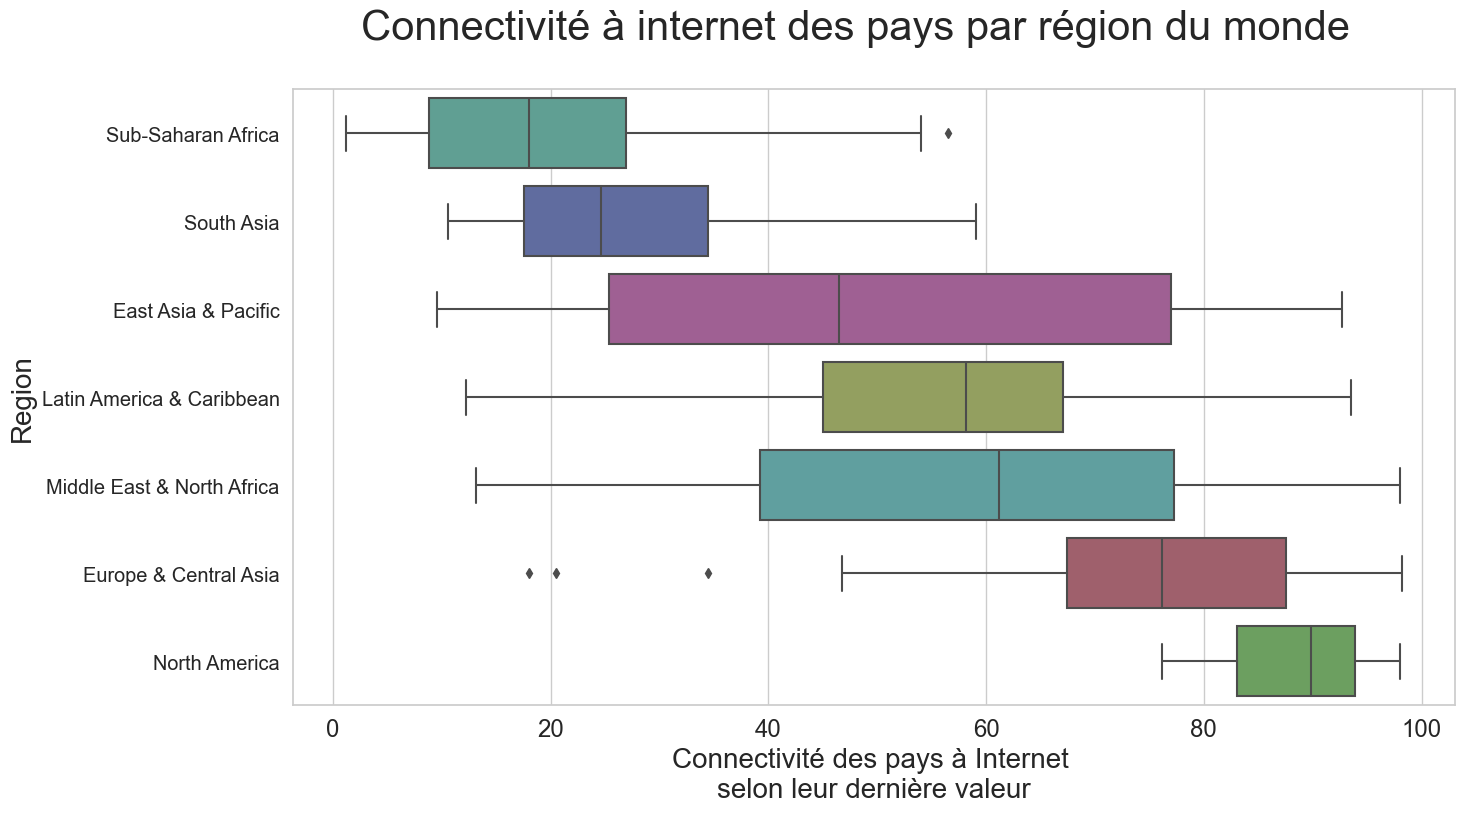

In [645]:
# Mettre à jour les données
data_IT['Dernière valeur non null'] = pd.to_numeric(data_IT['Dernière valeur non null'], errors='coerce')

# Calculer les médianes et trier les régions
median_values = data_IT.groupby('Region')['Dernière valeur non null'].median()
sorted_regions = median_values.sort_values(ascending=True).index

# Palette de couleurs personnalisée
custom_palette = ["#5A9", "#56A", "#A59", "#9A5", "#5AA", "#A56", "#6A5"]

# Définir un style de fond pour les graphiques
sns.set_style("whitegrid")

# Créer le graphique
fig = plt.figure(figsize=(15,8))
fig.suptitle('Connectivité à internet des pays par région du monde', fontsize=30)

chart = sns.boxplot(
    data=data_IT,
    x='Dernière valeur non null',
    y='Region',
    palette=custom_palette,
    order=sorted_regions
)

chart.set_xlabel('Connectivité des pays à Internet \nselon leur dernière valeur', fontsize=20)
chart.set_ylabel('Region', fontsize=20)

plt.xticks(horizontalalignment='center', fontweight='light', fontsize='x-large')
plt.yticks(fontweight='light', fontsize='large')

plt.show()

- **Le tableau représente les moyennes régionales de connectivité Internet et le graphique en boîte à moustaches illustre la distribution de la connectivité Internet par région mondiale.**
- Selon les boxplots,Les régions **"South Asia"** et **"sub-Saharan Africa"** sont les moins connectées à Internet,tandis que **"North America"** et **"Europe & Central Asia"** pèsentent une meilleure connectivité Internet.

**Je décide de retirer la liste les pays ayant une connectivité Internet inférieure à 50% car elle n'a que peu de potentiel dans notre projet de cours en ligne.**

In [646]:
# Triez les pays par ordre décroissant en fonction de leur dernière valeur non nulle
liste_pays = data_IT.sort_values(by='Dernière valeur non null', ascending=False)

# Filtrez la liste pour inclure uniquement les pays avec une connectivité supérieure à 50%
liste_pays = liste_pays[liste_pays['Dernière valeur non null'] > 50]

# Imprimez la liste des pays
liste_pays[['Country Name', 'Region', 'Dernière valeur non null']]

,Country Name,Region,Dernière valeur non null
411855,Iceland,Europe & Central Asia,98.240016
507145,Liechtenstein,Europe & Central Asia,98.093904
169965,Bermuda,North America,98.000000
144310,Bahrain,Middle East & North Africa,97.999981
107660,Andorra,Europe & Central Asia,97.930637
514475,Luxembourg,Europe & Central Asia,97.493930
628090,Norway,Europe & Central Asia,97.298204
287245,Denmark,Europe & Central Asia,96.967785
569450,Monaco,Europe & Central Asia,95.208178
327560,Faroe Islands,Europe & Central Asia,95.108682


#### <a name="C16"><font color='indianred'>4.1.3 Visualisation par pays</a>

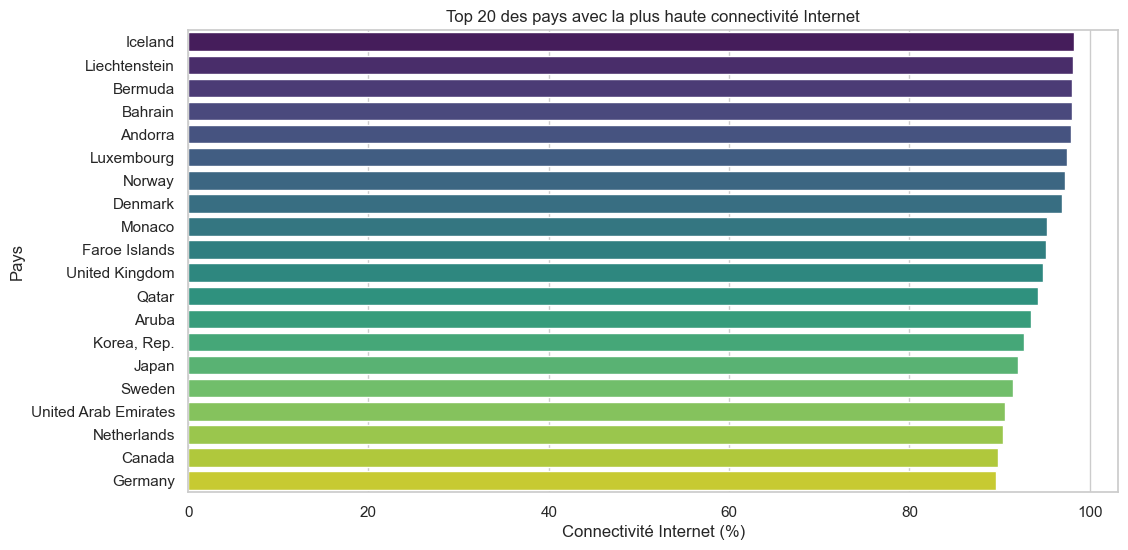

In [647]:
# Triez les pays par ordre décroissant en fonction de leur dernière valeur non nulle
liste_pays = data_IT.sort_values(by='Dernière valeur non null', ascending=False)

# Filtrez la liste pour inclure uniquement les pays avec une connectivité supérieure à 50%
liste_pays = liste_pays[liste_pays['Dernière valeur non null'] > 50]

# Sélectionnez les 20 premiers pays
top_20_pays = liste_pays.head(20)

# Créez un graphique à barres horizontales empilées
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_20_pays,
    x='Dernière valeur non null',
    y='Country Name',
    palette='viridis',
    orient='h'
)
plt.xlabel('Connectivité Internet (%)')
plt.ylabel('Pays')
plt.title('Top 20 des pays avec la plus haute connectivité Internet')
plt.show()

### <a name="C17"><font color='RoyalBlue'>4.2 Indicateurs économiques ("PIB/Habitant") :'NY.GDP.PCAP.CD'</a>

In [648]:
print('Liste des {} pays préselectionnés:\n{}'.format(len(liste_pays),liste_pays))

Liste des 108 pays préselectionnés:
                          Country Name                      Region  \
411855                         Iceland       Europe & Central Asia   
507145                   Liechtenstein       Europe & Central Asia   
169965                         Bermuda               North America   
144310                         Bahrain  Middle East & North Africa   
107660                         Andorra       Europe & Central Asia   
514475                      Luxembourg       Europe & Central Asia   
628090                          Norway       Europe & Central Asia   
287245                         Denmark       Europe & Central Asia   
569450                          Monaco       Europe & Central Asia   
327560                   Faroe Islands       Europe & Central Asia   
844325                  United Kingdom       Europe & Central Asia   
672070                           Qatar  Middle East & North Africa   
125985                           Aruba   Latin America

In [649]:
# Étape 1: Créez une copie de votre DataFrame original
dataPast_GDP = copy.deepcopy(dataPast)

# Étape 2: Définissez et utilisez la fonction pour filtrer les données par indicateur
def filter_par_indicateur(data, code_indicateur):
    return data[data['Indicator Code'] == code_indicateur]

# Filtrez les données
data_GDP = filter_par_indicateur(dataPast_GDP, 'NY.GDP.PCAP.CD')
print(data_GDP.head(5))

          Country Name                      Region  Indicator Code  \
92870      Afghanistan                  South Asia  NY.GDP.PCAP.CD   
96535          Albania       Europe & Central Asia  NY.GDP.PCAP.CD   
100200         Algeria  Middle East & North Africa  NY.GDP.PCAP.CD   
103865  American Samoa         East Asia & Pacific  NY.GDP.PCAP.CD   
107530         Andorra       Europe & Central Asia  NY.GDP.PCAP.CD   

                                                    Topic  \
92870   Economic Policy & Debt: National accounts: US$...   
96535   Economic Policy & Debt: National accounts: US$...   
100200  Economic Policy & Debt: National accounts: US$...   
103865  Economic Policy & Debt: National accounts: US$...   
107530  Economic Policy & Debt: National accounts: US$...   

       Dernière année non null  Dernière valeur non null  
92870                     2016                561.778746  
96535                     2016               4124.982390  
100200                    2016     

In [650]:
# Étape 1: Créez une copie de votre DataFrame original
dataPast_GDP = copy.deepcopy(dataPast)

# Étape 2: Filtrez les données pour chaque indicateur
def filter_par_indicateur(data, code_indicateur):
    return data[data['Indicator Code'] == code_indicateur]

In [651]:
# Filtrez les données
data_GDP = filter_par_indicateur(dataPast_GDP, 'NY.GDP.PCAP.CD')
data_GDP.head(5)

,Country Name,Region,Indicator Code,Topic,Dernière année non null,Dernière valeur non null
92870,Afghanistan,South Asia,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,2016,561.778746
96535,Albania,Europe & Central Asia,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,2016,4124.982390
100200,Algeria,Middle East & North Africa,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,2016,3916.881571
103865,American Samoa,East Asia & Pacific,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,2016,11834.745229
107530,Andorra,Europe & Central Asia,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,2016,36988.622030


**Data Cleaning du DF 'dataPast'**

- Filtrage des pays  présélectionnés selon l'indicateur 'IT.NET.USER.P2'
- Suppression des 'Indicator Code' à l'exception de 'NY.GDP.PCAP.CD'
- Suppression des colonnes inutiles

In [652]:
# Filtrez maintenant data_GDP avec la liste des pays normalisée
data_filtré = data_GDP[data_GDP['Country Name'].isin(liste_pays['Country Name'])]

# Affichez la forme du dataframe filtré
print(data_filtré.head(3))

               Country Name                     Region  Indicator Code  \
96535               Albania      Europe & Central Asia  NY.GDP.PCAP.CD   
107530              Andorra      Europe & Central Asia  NY.GDP.PCAP.CD   
114860  Antigua and Barbuda  Latin America & Caribbean  NY.GDP.PCAP.CD   

                                                    Topic  \
96535   Economic Policy & Debt: National accounts: US$...   
107530  Economic Policy & Debt: National accounts: US$...   
114860  Economic Policy & Debt: National accounts: US$...   

       Dernière année non null  Dernière valeur non null  
96535                     2016               4124.982390  
107530                    2016              36988.622030  
114860                    2016              14462.176279  


In [653]:
#Création d'une liste d'indicateurs à tester
liste_GDP = dataPast_GDP[(dataPast_GDP ['Topic'].str.contains('Economic Policy & Debt')) \
                  & (dataPast_GDP ['Indicator Code'].str.contains('GDP'))]['Indicator Code'].unique()
print('Liste des 8 indicateurs de richesses à tester:\n{}'.format(liste_GDP))

Liste des 8 indicateurs de richesses à tester:
['NY.GDP.MKTP.KD' 'NY.GDP.MKTP.CD' 'NY.GDP.PCAP.KD' 'NY.GDP.PCAP.CD'
 'NY.GDP.PCAP.PP.KD' 'NY.GDP.PCAP.PP.CD' 'NY.GDP.MKTP.PP.KD'
 'NY.GDP.MKTP.PP.CD']


In [654]:
#filtrer mon DF sur ces 8 'Indicator Code'
data_GDP_filtrée= dataPast_GDP[dataPast_GDP['Indicator Code'].isin(liste_GDP)]
data_GDP_filtrée.head(3)

,Country Name,Region,Indicator Code,Topic,Dernière année non null,Dernière valeur non null
92867,Afghanistan,South Asia,NY.GDP.MKTP.KD,Economic Policy & Debt: National accounts: US$...,2016,2.066392e+10
92868,Afghanistan,South Asia,NY.GDP.MKTP.CD,Economic Policy & Debt: National accounts: US$...,2016,1.946902e+10
92869,Afghanistan,South Asia,NY.GDP.PCAP.KD,Economic Policy & Debt: National accounts: US$...,2016,5.962576e+02


- **En me basant sur leurs définitions respectives, je choisi de retenir
l'indicateur 'NY.GDP.PCAP.CD' qui représente le PIB par habitant.**

In [655]:
# Filtrer le DataFrame avec l'indicateur 'NY.GDP.PCAP.CD'
data_GDP = data_GDP_filtrée[(data_GDP_filtrée['Indicator Code'] == 'NY.GDP.PCAP.CD') & 
                             (data_GDP_filtrée['Country Name'].isin(liste_pays['Country Name']))]

# Vérifier la forme du DataFrame filtré
print(data_GDP.shape)

(108, 6)


In [656]:
# Suppression des colonnes inutiles
data_GDP=data_GDP.drop(columns=['Topic' ,'Dernière année non null'])
data_GDP.head()

,Country Name,Region,Indicator Code,Dernière valeur non null
96535,Albania,Europe & Central Asia,NY.GDP.PCAP.CD,4124.982390
107530,Andorra,Europe & Central Asia,NY.GDP.PCAP.CD,36988.622030
114860,Antigua and Barbuda,Latin America & Caribbean,NY.GDP.PCAP.CD,14462.176279
118525,Argentina,Latin America & Caribbean,NY.GDP.PCAP.CD,12440.320982
122190,Armenia,Europe & Central Asia,NY.GDP.PCAP.CD,3614.688357


In [657]:
# Renommer de la colonne 'Dernière valeur non null' en 'PIB/Habitant'
data_GDP.rename(columns={"Dernière valeur non null": "PIB/Habitant"}, inplace=True)

In [658]:
#Trier les pays selon leurs PIB/Habitant
data_GDP = data_GDP.sort_values(by='PIB/Habitant',ascending=False)
data_GDP.head()

,Country Name,Region,Indicator Code,PIB/Habitant
507015,Liechtenstein,Europe & Central Asia,NY.GDP.PCAP.CD,168146.015281
569320,Monaco,Europe & Central Asia,NY.GDP.PCAP.CD,162009.877819
514345,Luxembourg,Europe & Central Asia,NY.GDP.PCAP.CD,100573.139978
169835,Bermuda,North America,NY.GDP.PCAP.CD,85748.065414
781890,Switzerland,Europe & Central Asia,NY.GDP.PCAP.CD,79890.524005


In [659]:
# Création d'un pivot table avec 'Country Name' et 'Region' comme index
# et les différentes valeurs 'Indicator Code' comme colonnes.
# La valeur que nous voulons agréger est 'PIB/100 Habitant'.
dataPivot_PIB = data_GDP.pivot_table(values='PIB/Habitant', index=['Country Name', 'Region'],columns='Indicator Code').reset_index()
dataPivot_PIB

Indicator Code,Country Name,Region,NY.GDP.PCAP.CD
0,Albania,Europe & Central Asia,4124.982390
1,Andorra,Europe & Central Asia,36988.622030
2,Antigua and Barbuda,Latin America & Caribbean,14462.176279
3,Argentina,Latin America & Caribbean,12440.320982
4,Armenia,Europe & Central Asia,3614.688357
5,Aruba,Latin America & Caribbean,25324.720362
6,Australia,East Asia & Pacific,49927.819509
7,Austria,Europe & Central Asia,44676.345835
8,Azerbaijan,Europe & Central Asia,3876.936433
9,"Bahamas, The",Latin America & Caribbean,28785.477671


#### <a name="C18"><font color='indianred'>4.2.1 Visualisation par région</a>

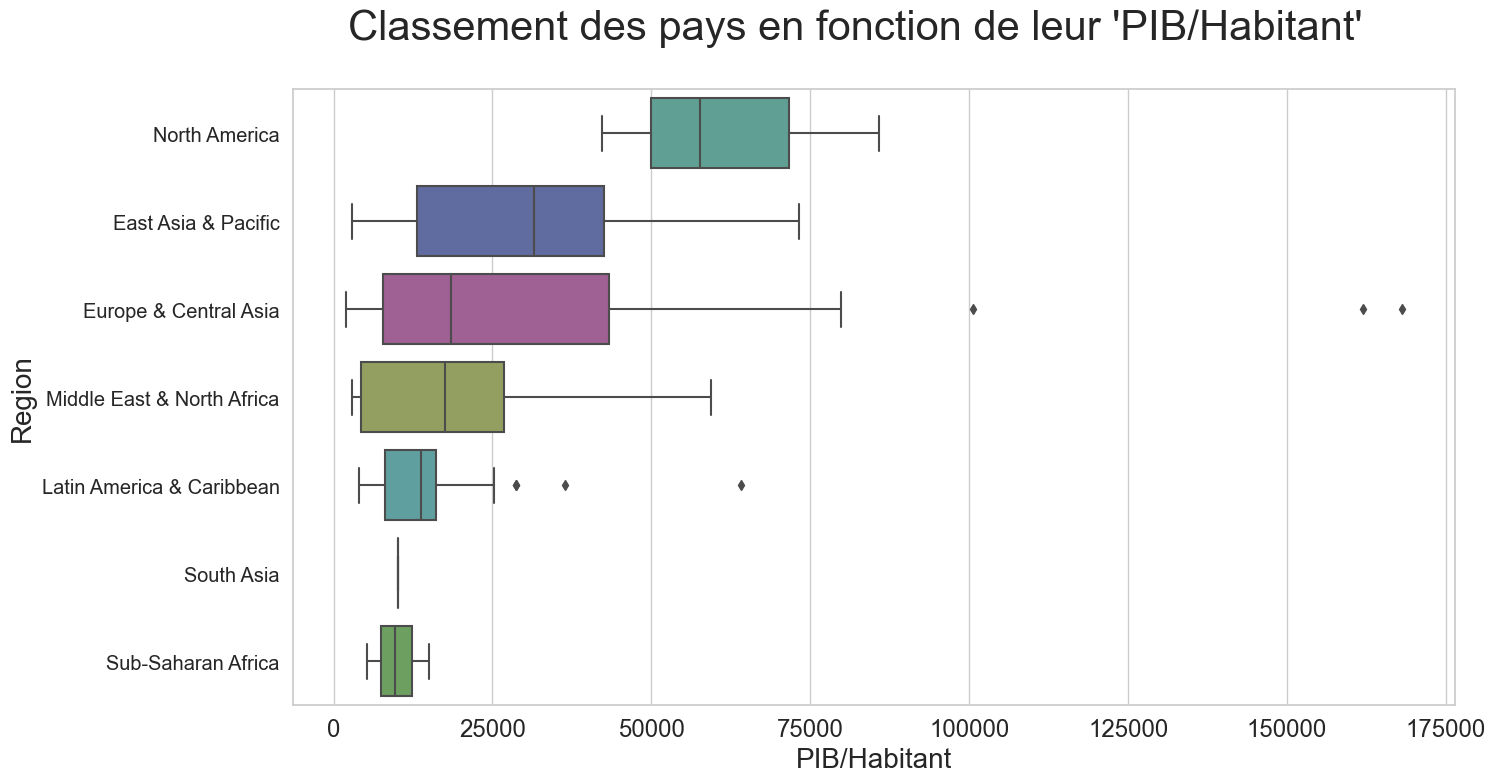

In [660]:
# Mettre à jour les données
data_GDP['PIB/Habitant'] = pd.to_numeric(data_GDP['PIB/Habitant'], errors='coerce')

# Calculez l'ordre des régions basé sur la médiane du 'PIB/Habitant'.
order = data_GDP.groupby('Region')['PIB/Habitant'].median().sort_values(ascending=False).index

# Palette de couleurs personnalisée
custom_palette = ["#5A9", "#56A", "#A59", "#9A5", "#5AA", "#A56", "#6A5"]

# Définir un style de fond pour les graphiques
sns.set_style("whitegrid")

# Graphique en boîte à moustaches.
fig = plt.figure(figsize=(15,8))
fig.suptitle('Classement des pays en fonction de leur \'PIB/Habitant\'', fontsize=30)

chart = sns.boxplot(
    data=data_GDP,
    x='PIB/Habitant',
    y='Region',
    palette=custom_palette,
    order=order
)

chart.set_xlabel('PIB/Habitant',fontsize = 20) #xlabel
chart.set_ylabel('Region', fontsize = 20) #ylabel

plt.xticks(horizontalalignment='center', fontweight='light', fontsize='x-large')
plt.yticks(fontweight='light', fontsize='large')
plt.show()


- **le boxplot nous donne un résumé statistique par région en fonction du PIB/Habitant de chaque pays.**
- **Ce graphique nous permet de noter que la région 'North America' se distingue du reste du monde par son PIB/Habitant élevé.**
- **On note également que la région 'Europe & Central Asia' presente dans son dernier quartile des valeurs de PIB/Habitant très élevé.**

#### <a name="C19"><font color='indianred'>4.2.2 Visualisation par pays</a>

C:\Users\samir\AppData\Local\Temp\ipykernel_20592\4054903223.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticks(), size=16)


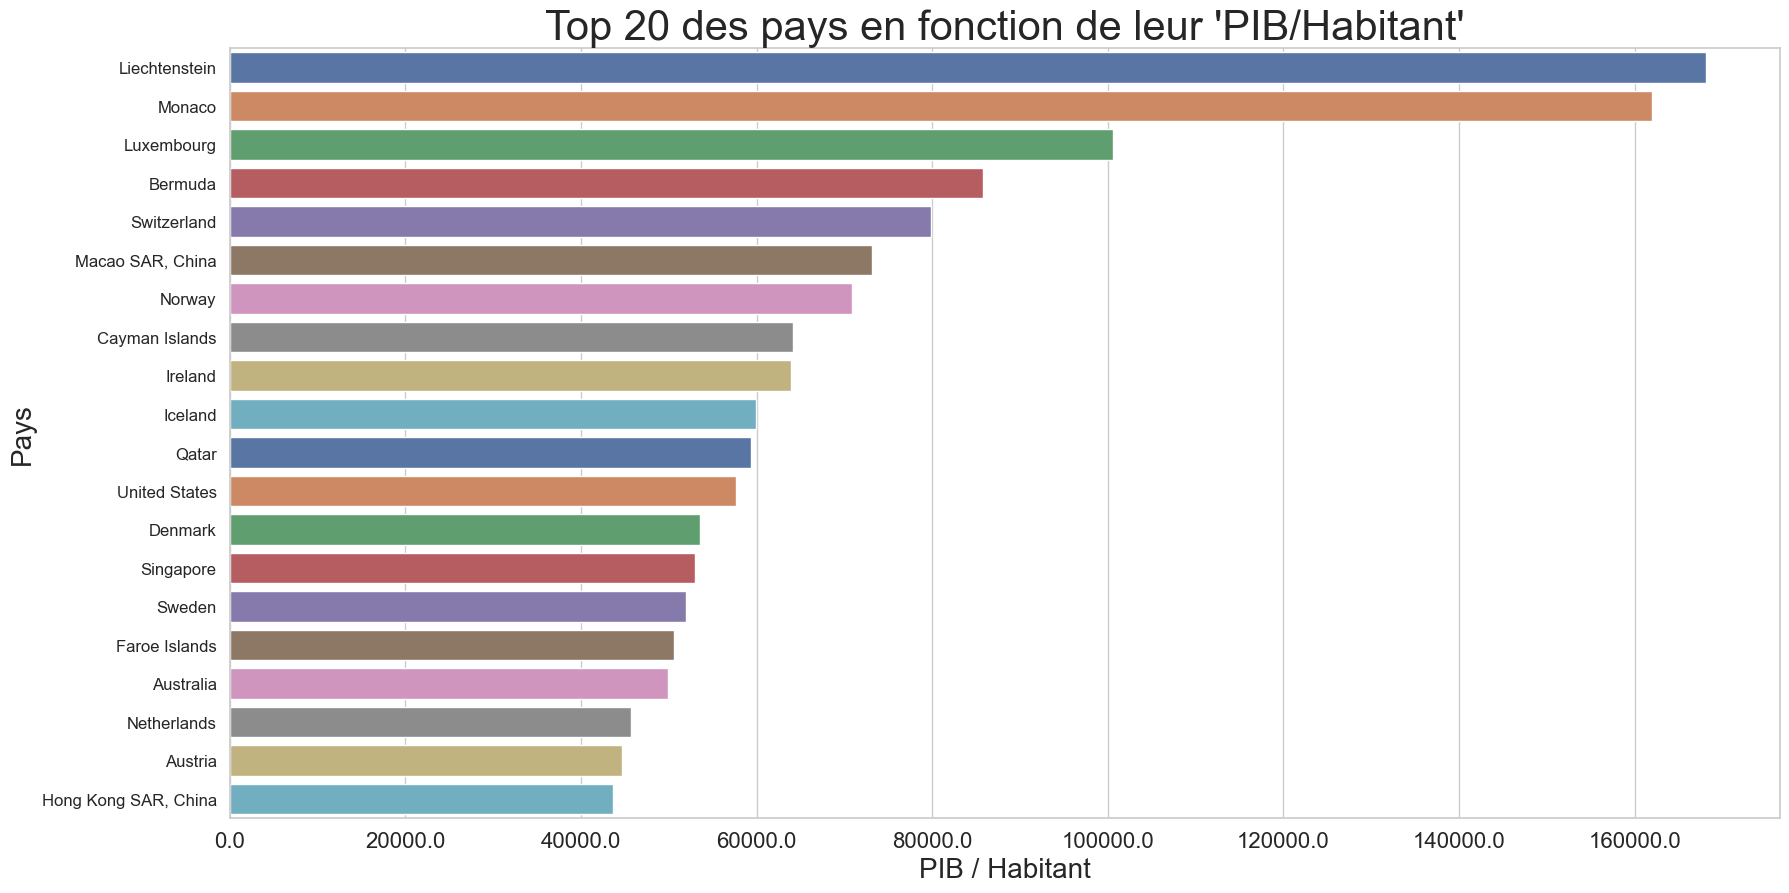

In [661]:
# Triez les données par 'PIB/Habitant' dans un ordre décroissant pour une meilleure lisibilité.
data_GDP_sorted = data_GDP.sort_values('PIB/Habitant', ascending=False)

# Prenez uniquement les 20 premières lignes pour les 20 premiers pays.
data_GDP_top20 = data_GDP_sorted.head(20)

# Créez un graphique à barres pour afficher uniquement ces 20 pays.
fig, ax = plt.subplots(figsize=(20, 10))  # Ajustez la hauteur pour 20 pays.

# Ici, 'ax' doit être un seul objet AxesSubplot, pas un tableau.
ax.set_title('Top 20 des pays en fonction de leur \'PIB/Habitant\'', fontsize=30)

# Créez le graphique à barres avec les données triées pour les 20 premiers pays.
chart = sns.barplot(
    data=data_GDP_top20,
    x='PIB/Habitant', 
    y='Country Name',
    palette="deep",
    ax=ax  # Passez l'objet 'ax' directement à Seaborn.
)

# Définissez la taille de police pour les axes et les étiquettes pour une meilleure lisibilité.
chart.set_xlabel('PIB / Habitant', fontsize=20)
chart.set_ylabel('Pays', fontsize=20)

# Ajustez la taille de police des marques de graduation pour les rendre lisibles.
chart.set_xticklabels(chart.get_xticks(), size=16)
chart.set_yticklabels(data_GDP_top20['Country Name'], size=12)

plt.show()


**Le graphique à barre nous montre une grande différence de richesses existantes entre les habitants des différents pays du monde.**

### <a name="C20"><font color='RoyalBlue'>4.3 Indicateurs de Population Etudiante:'UIS.E.3' et 'SE.TER.ENRL'</a>

In [662]:
# Copiez dataPast pour travailler avec le deuxième indicateur
dataPast_TER = copy.deepcopy(dataPast)
dataPast_UIS = copy.deepcopy(dataPast)

# Filtrer les données pour les indicateurs 'SE.TER.ENRL' et 'UIS.E.3' en utilisant la même liste de pays
data_TER = filter_par_indicateur(dataPast_TER, 'SE.TER.ENRL')
data_UIS = filter_par_indicateur(dataPast_UIS, 'UIS.E.3')

# Filtrer les données pour ne garder que les pays de la liste_pays
data_TER = data_TER[data_TER['Country Name'].isin(liste_pays['Country Name'])]
data_UIS = data_UIS[data_UIS['Country Name'].isin(liste_pays['Country Name'])]

# Concaténer les résultats dans un seul tableau
data_combined = pd.concat([data_TER, data_UIS])

# Vérifier la forme après avoir supprimé les doublons
print(data_combined.head(3))

               Country Name                     Region Indicator Code  \
96494               Albania      Europe & Central Asia    SE.TER.ENRL   
107489              Andorra      Europe & Central Asia    SE.TER.ENRL   
114819  Antigua and Barbuda  Latin America & Caribbean    SE.TER.ENRL   

           Topic Dernière année non null  Dernière valeur non null  
96494   Tertiary                    2015                  160527.0  
107489  Tertiary                    2015                     501.0  
114819  Tertiary                    2012                    1792.0  


**Data Cleaning du DF 'dataPast'**

- Filtrage des pays  présélectionnés selon l'indicateur 'IT.NET.USER.P2'
- Suppression des 'Indicator Code' à l'exception de 'UIS.E.3' et 'SE.TER.ENRL'
- Suppression des colonnes inutiles

**En me basant sur les définitions respectives des indicateurs sur le site de la banque mondiale,je choisi de retenir les indicateurs :**

- **'UIS.E.3'**:représente le nombre d'inscriptions dans l'enseignement secondaire, supérieur, pour les deux sexes.
- **'SE.TER.ENRL'**:représente le nombre d'inscriptions dans l'enseignement supérieur, tous programmes confondus, pour les deux sexes
- Donc je filtre mon DF avec les indicateurs 'UIS.E.3' et 'SE.TER.ENRL'

In [663]:
# Filtrer le DataFrame avec les indicateurs 'UIS.E.3' et 'SE.TER.ENRL' et les pays de votre liste
data_UIS_TER = data_combined[(data_combined['Indicator Code'].isin(['UIS.E.3', 'SE.TER.ENRL'])) & 
                              (data_combined['Country Name'].isin(liste_pays['Country Name']))]

# Vérifier la forme du DataFrame filtré
print(data_UIS_TER.head())

               Country Name                     Region Indicator Code  \
96494               Albania      Europe & Central Asia    SE.TER.ENRL   
107489              Andorra      Europe & Central Asia    SE.TER.ENRL   
114819  Antigua and Barbuda  Latin America & Caribbean    SE.TER.ENRL   
118484            Argentina  Latin America & Caribbean    SE.TER.ENRL   
122149              Armenia      Europe & Central Asia    SE.TER.ENRL   

           Topic Dernière année non null  Dernière valeur non null  
96494   Tertiary                    2015                  160527.0  
107489  Tertiary                    2015                     501.0  
114819  Tertiary                    2012                    1792.0  
118484  Tertiary                    2014                 2869450.0  
122149  Tertiary                    2015                  107665.0  


In [664]:
# Suppression des colonnes inutiles
data_UIS_TER = data_UIS_TER.drop(columns=['Topic','Dernière année non null'])
data_UIS_TER.head()

,Country Name,Region,Indicator Code,Dernière valeur non null
96494,Albania,Europe & Central Asia,SE.TER.ENRL,160527.0
107489,Andorra,Europe & Central Asia,SE.TER.ENRL,501.0
114819,Antigua and Barbuda,Latin America & Caribbean,SE.TER.ENRL,1792.0
118484,Argentina,Latin America & Caribbean,SE.TER.ENRL,2869450.0
122149,Armenia,Europe & Central Asia,SE.TER.ENRL,107665.0


In [665]:
# Afin que 'Country Name' soit considéré comme une colonne, j'effectue un reset_index().
dataPivot_ET = data_UIS_TER.pivot_table('Dernière valeur non null',index=['Country Name','Region'],columns='Indicator Code').reset_index()
# Je remplace les valeurs 'NaN' par des 0 pour que l'addition des deux colonnes 
# ne donne pas 'NaN' si l'une des deux valeurs vaut 'NaN'.
dataPivot_ET.fillna(0, inplace=True)
dataPivot_ET.head()

Indicator Code,Country Name,Region,SE.TER.ENRL,UIS.E.3
0,Albania,Europe & Central Asia,160527.0,151937.0
1,Andorra,Europe & Central Asia,501.0,1288.0
2,Antigua and Barbuda,Latin America & Caribbean,1792.0,2615.0
3,Argentina,Latin America & Caribbean,2869450.0,1722700.0
4,Armenia,Europe & Central Asia,107665.0,103385.0


In [666]:
# Création d'un pivot table avec 'Country Name' et 'Region' comme index
dataPivot_ET['total_etudiant'] = dataPivot_ET.apply(lambda row: row['SE.TER.ENRL'] + row['UIS.E.3'], axis=1)
dataPivot_ET.head()

Indicator Code,Country Name,Region,SE.TER.ENRL,UIS.E.3,total_etudiant
0,Albania,Europe & Central Asia,160527.0,151937.0,312464.0
1,Andorra,Europe & Central Asia,501.0,1288.0,1789.0
2,Antigua and Barbuda,Latin America & Caribbean,1792.0,2615.0,4407.0
3,Argentina,Latin America & Caribbean,2869450.0,1722700.0,4592150.0
4,Armenia,Europe & Central Asia,107665.0,103385.0,211050.0


In [667]:
dataPivot_ET = dataPivot_ET.sort_values(by='total_etudiant', ascending=False)
dataPivot_ET.head(10)

Indicator Code,Country Name,Region,SE.TER.ENRL,UIS.E.3,total_etudiant
22,China,East Asia & Pacific,43367392.00,43709224.00,87076616.00
101,United States,North America,19531728.00,11736315.00,31268043.00
16,Brazil,Latin America & Caribbean,8285475.00,9949583.00,18235058.00
97,Turkey,Europe & Central Asia,6062886.00,4995623.00,11058509.00
82,Russian Federation,Europe & Central Asia,6592416.00,2823004.00,9415420.00
44,"Iran, Islamic Rep.",Middle East & North Africa,4802721.00,3691835.00,8494556.00
64,Mexico,Latin America & Caribbean,3419391.00,4682336.00,8101727.00
48,Japan,East Asia & Pacific,3862460.00,3682920.00,7545380.00
100,United Kingdom,Europe & Central Asia,2352932.75,4195081.50,6548014.25
37,Germany,Europe & Central Asia,2977781.00,2579952.25,5557733.25


In [668]:
#Supprimer les colonnes initules
dataPivot_ET.drop(columns=['SE.TER.ENRL','UIS.E.3'])

Indicator Code,Country Name,Region,total_etudiant
22,China,East Asia & Pacific,8.707662e+07
101,United States,North America,3.126804e+07
16,Brazil,Latin America & Caribbean,1.823506e+07
97,Turkey,Europe & Central Asia,1.105851e+07
82,Russian Federation,Europe & Central Asia,9.415420e+06
44,"Iran, Islamic Rep.",Middle East & North Africa,8.494556e+06
64,Mexico,Latin America & Caribbean,8.101727e+06
48,Japan,East Asia & Pacific,7.545380e+06
100,United Kingdom,Europe & Central Asia,6.548014e+06
37,Germany,Europe & Central Asia,5.557733e+06


#### <a name="C21"><font color='indianred'>4.3.1 Visualisation par pays</a>

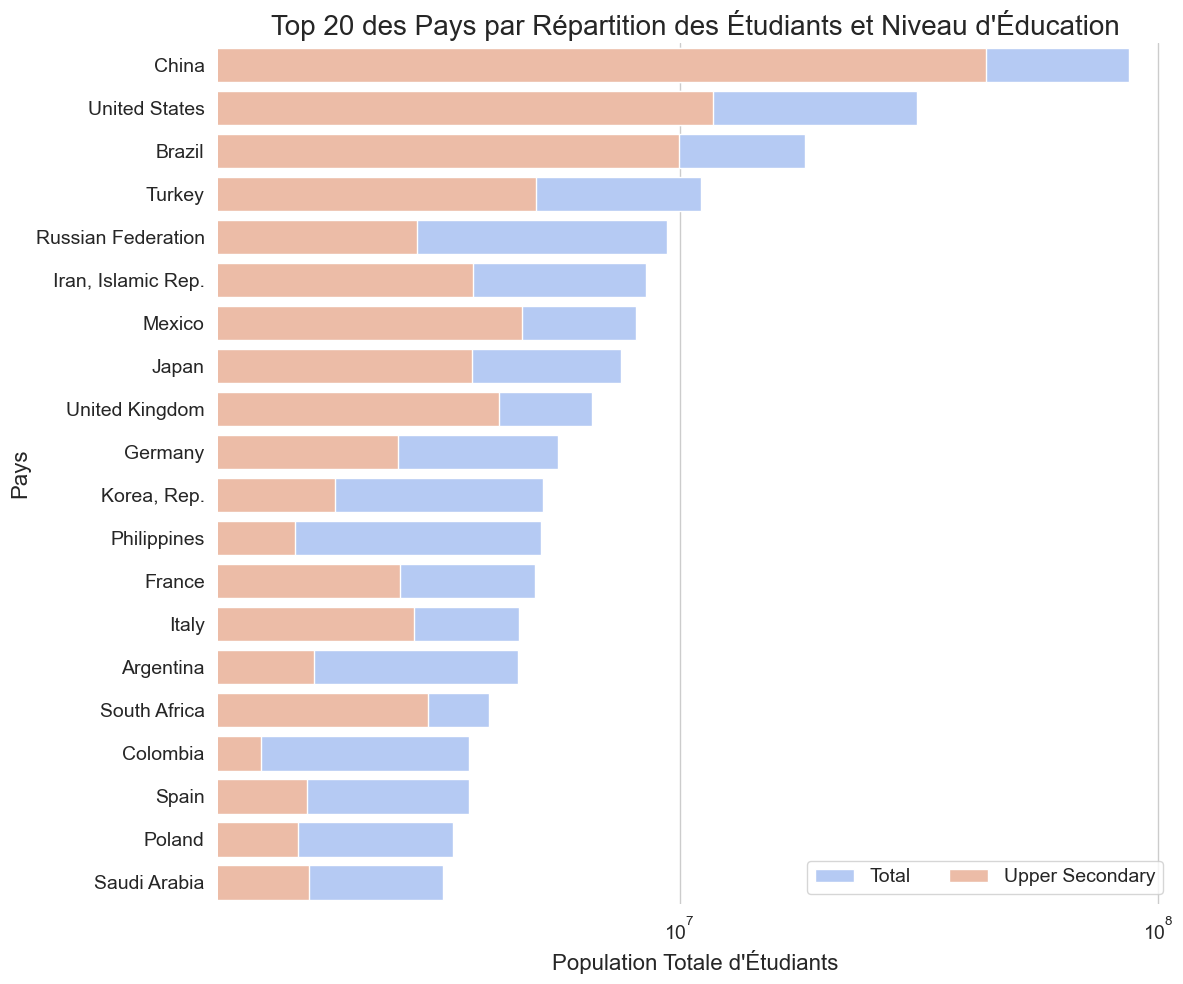

In [669]:
# Trier les données par ordre décroissant en fonction du nombre total d'étudiants
dataPivot_sorted = dataPivot_ET.sort_values(by='total_etudiant', ascending=False)

# Sélectionner les 20 premiers pays
top_20_pays = dataPivot_sorted.head(20)

# Initialisation de la figure matplotlib avec une taille ajustée pour une meilleure visibilité
f, ax = plt.subplots(figsize=(12, 10))

# Utilisation d'une palette de couleurs professionnelle de Seaborn
palette = sns.color_palette("coolwarm", 2)

# Affichage du nombre total d'étudiants avec la première couleur de la palette
sns.barplot(
    x="total_etudiant", 
    y="Country Name", 
    data=top_20_pays,
    label="Total", 
    color=palette[0]
)

# Affichage du nombre d'étudiants en 'Upper Secondary' avec la deuxième couleur de la palette
sns.barplot(
    x="UIS.E.3", 
    y="Country Name", 
    data=top_20_pays, 
    label="Upper Secondary", 
    color=palette[1]
)

# Ajout de la légende avec une meilleure visibilité
ax.legend(ncol=2, loc="lower right", frameon=True, fontsize=14)

# Amélioration des labels pour les axes pour une meilleure lisibilité
ax.set(ylabel="Pays", xlabel="Population Totale d'Étudiants")
ax.set_ylabel("Pays", fontsize=16)
ax.set_xlabel("Population Totale d'Étudiants", fontsize=16)

# Ajustement de la taille des étiquettes des axes
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Passage de l'axe des abscisses en échelle logarithmique pour une meilleure distribution visuelle
ax.set_xscale('log')

# Suppression des bordures inutiles pour un look plus épuré
sns.despine(left=True, bottom=True)

# Ajout d'un titre au graphique avec une taille de police augmentée pour l'accentuation
ax.set_title('Top 20 des Pays par Répartition des Étudiants et Niveau d\'Éducation', fontsize=20)

# Affichage du graphique
plt.tight_layout()
plt.show()


#### <a name="C22"><font color='indianred'>4.3.2 Visualisation par region</a>

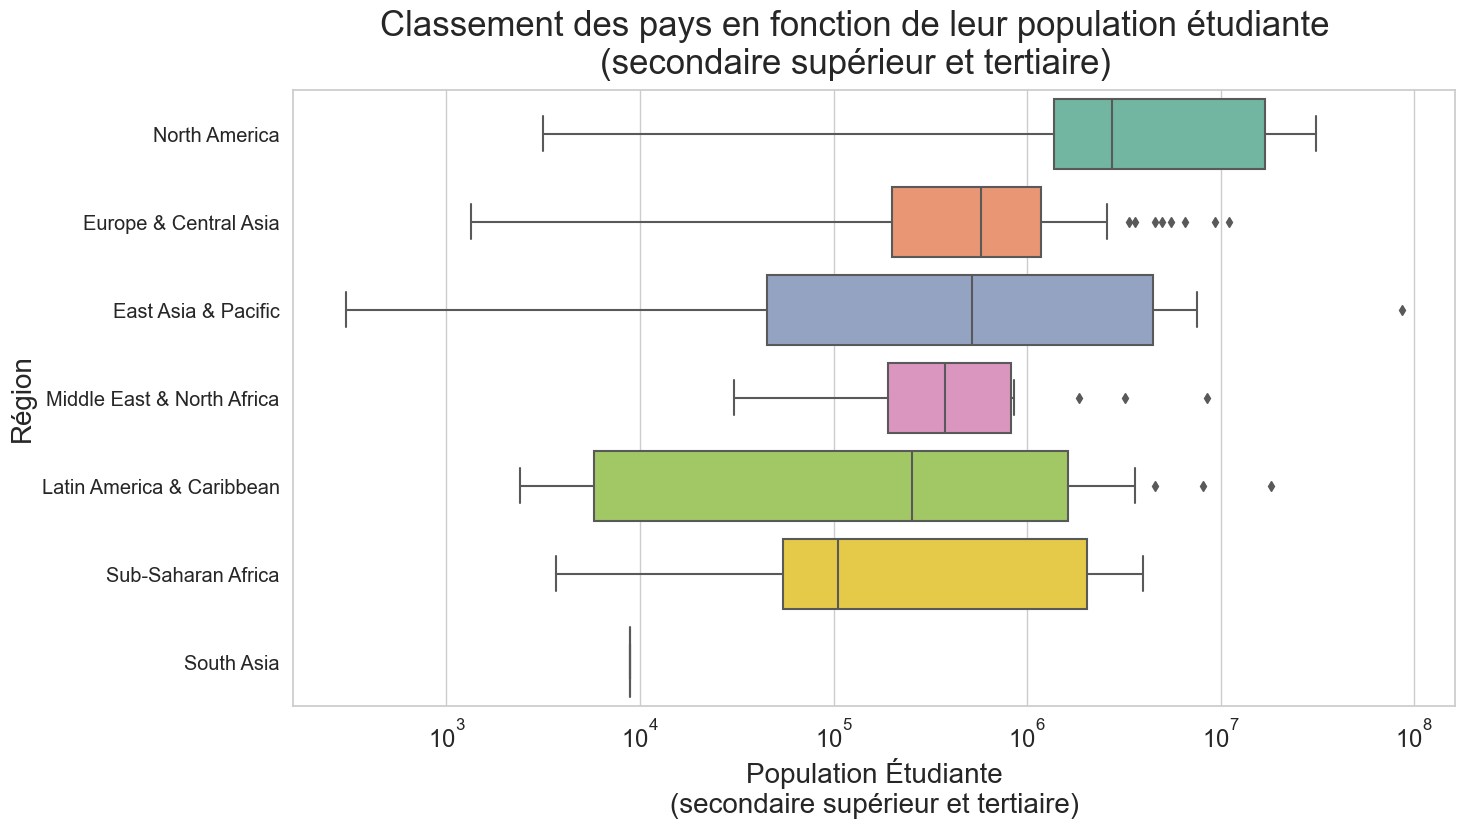

In [670]:
# Convertir 'popTotalEtudiant' en numérique, les erreurs sont converties en NaN
dataPivot_ET['total_etudiant'] = pd.to_numeric(dataPivot_ET['total_etudiant'], errors='coerce')

# Supprimer les lignes avec des valeurs NaN dans 'popTotalEtudiant'
dataPivot_ET.dropna(subset=['total_etudiant'], inplace=True)

# Maintenant, vous pouvez tracer le graphique sans rencontrer d'erreur de conversion
fig = plt.figure(figsize=(15,8))
fig.suptitle('Classement des pays en fonction de leur population étudiante\n(secondaire supérieur et tertiaire)', fontsize=25)

chart = sns.boxplot(
    data=dataPivot_ET,
    x="total_etudiant",
    y='Region',
    palette='Set2',
    order=dataPivot_ET.groupby('Region')['total_etudiant'].median().sort_values(ascending=False).index
)

chart.set_xlabel('Population Étudiante\n(secondaire supérieur et tertiaire)', fontsize=20) #xlabel
chart.set_ylabel('Région', fontsize=20) #ylabel

chart.set_xscale('log')

plt.xticks(
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'  
)

plt.yticks(
    fontweight='light',
    fontsize='large'
)
plt.show()


- **Le boxplot nous montre que la région à savoir 'North America' regroupe majoritairement les pays ayant le plus d'étudiant
inscrits en secondaire supérieur et en tertiaire.**

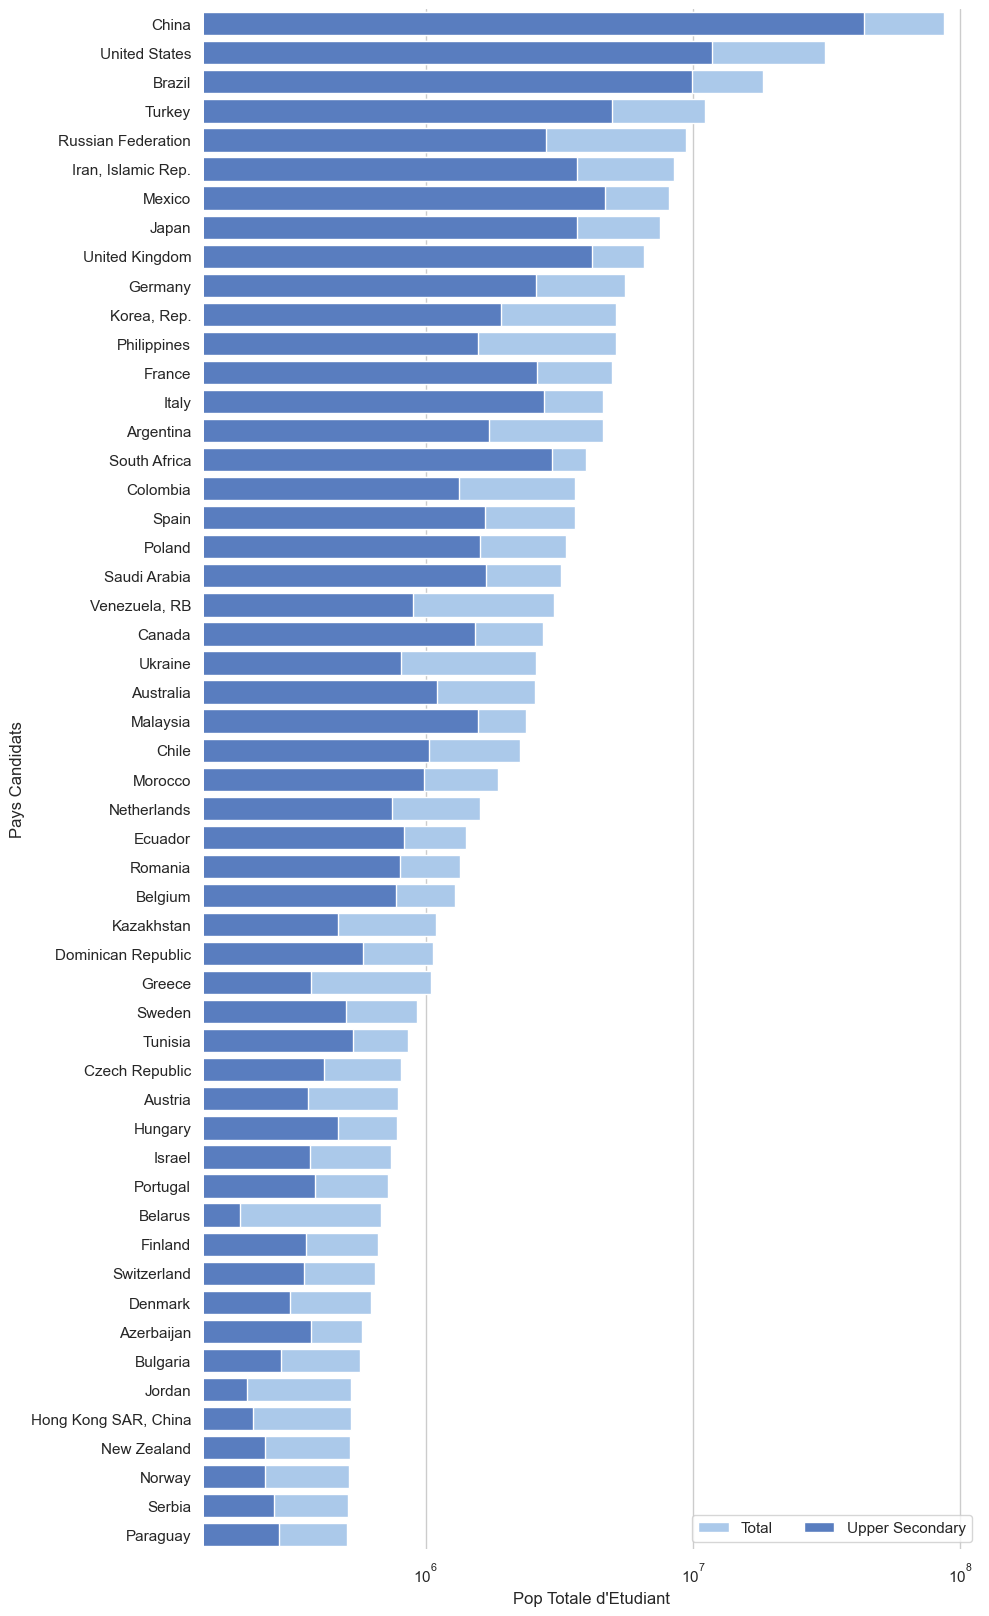

In [671]:
#je décide de retenir,les pays qui ont une Population etudiante (2nd Sup + Ter.) supérieure à 500 000.

sns.set(style="whitegrid")

# Initialisation de la figure matplotlib
f, ax = plt.subplots(figsize=(10, 20))

# Affichage du nombre total d'étudiant 
# (inscrits en 'Upper Secondary' + 'Tertiary') 
# en bleu clair.
sns.set_color_codes("pastel")
sns.barplot(
    x="total_etudiant", 
    y="Country Name", 
    data=dataPivot_ET[dataPivot_ET['total_etudiant']>500000],
    label="Total", 
    color="b"
)

# Affichage du nombre total d'étudiant 
# (inscrits en 'Upper Secondary') 
# en bleu foncé.
sns.set_color_codes("muted")
sns.barplot(
    x="UIS.E.3", 
    y="Country Name", 
    data=dataPivot_ET[dataPivot_ET['total_etudiant']>500000], 
    label="Upper Secondary", 
    color="b"
)

# Ajout de la légende sur 2 colonnes
ax.legend(ncol=2, loc="lower right", frameon=True)
# Délimitation de l'axe des abscisses et nommage des labels des axes
ax.set(
    ylabel="Pays Candidats",
    xlabel="Pop Totale d'Etudiant")
# Passage de l'axe des abscisse en echelle logarithmique
ax.set_xscale('log')
# Suppression de la barre de délimitation du graphique sur les parties gauche et basse.
sns.despine(left=True, bottom=True)

- **Le graphique illustre que l'Inde, la Chine et les États-Unis dominent en termes de populations étudiantes avec des nombres significativement élevés**
- **Tandis que les pays en bas de la liste, comme Sebia et le Paraguay ont des populations étudiantes plus modestes mais toujours supérieures à 500 000.**
- **La superposition des barres indique que la majorité des étudiants dans presque tous les pays se trouve dans l'enseignement secondaire supérieur.**

#### <a name="C23"><font color='indianred'>4.3.3 Merge des trois tables de pivot</a>

In [672]:
# Pour 'dataPivot_PIB' et 'dataPivot_ET', ne sélectionnez que les colonnes nécessaires
dataPivot_PIB = dataPivot_PIB[['Country Name', 'NY.GDP.PCAP.CD']]
dataPivot_ET = dataPivot_ET[['Country Name', 'total_etudiant']]

# Effectuez la fusion en gardant la colonne 'Country Name' du premier DataFrame
dataPivot = dataPivot_IT.merge(dataPivot_PIB, on='Country Name', how='inner')
dataPivot = dataPivot.merge(dataPivot_ET, on='Country Name', how='inner')
print('Le DF \'dataPivot\' contient bien la liste des {} pays candidats :'.format(len(dataPivot)))
dataPivot.head()

Le DF 'dataPivot' contient bien la liste des 106 pays candidats :


Indicator Code,Country Name,Region,IT.NET.USER.P2,NY.GDP.PCAP.CD,total_etudiant
0,Albania,Europe & Central Asia,66.363445,4124.982390,312464.0
1,Andorra,Europe & Central Asia,97.930637,36988.622030,1789.0
2,Antigua and Barbuda,Latin America & Caribbean,73.000000,14462.176279,4407.0
3,Argentina,Latin America & Caribbean,70.150764,12440.320982,4592150.0
4,Armenia,Europe & Central Asia,62.000000,3614.688357,211050.0


## <a name="C24"><font color='DodgerBlue'>5. Pondération et score d'attractivité<font></a>

In [673]:
# Trier le DataFrame par la colonne 'total_etudiant' par ordre décroissant
dataPivot_sorted = dataPivot.sort_values(by='total_etudiant', ascending=False)

# Afficher les premières lignes du DataFrame trié
dataPivot_sorted.head()

Indicator Code,Country Name,Region,IT.NET.USER.P2,NY.GDP.PCAP.CD,total_etudiant
22,China,East Asia & Pacific,53.200000,8123.180873,87076616.0
101,United States,North America,76.176737,57638.159088,31268043.0
16,Brazil,Latin America & Caribbean,59.682747,8649.948492,18235058.0
97,Turkey,Europe & Central Asia,58.347734,10862.600399,11058509.0
82,Russian Federation,Europe & Central Asia,76.409085,8748.364504,9415420.0


In [674]:
# Étape 1: Normalisation des indicateurs
scaler = MinMaxScaler()

# Les noms des colonnes des indicateurs
colonnes_a_normaliser= ['IT.NET.USER.P2', 'NY.GDP.PCAP.CD', 'total_etudiant']

# Appliquer la normalisation
dataPivot[colonnes_a_normaliser] = scaler.fit_transform(dataPivot[colonnes_a_normaliser])
dataPivot

Indicator Code,Country Name,Region,IT.NET.USER.P2,NY.GDP.PCAP.CD,total_etudiant
0,Albania,Europe & Central Asia,0.339187,0.013382,0.003585
1,Andorra,Europe & Central Asia,0.993586,0.211063,0.000017
2,Antigua and Barbuda,Latin America & Caribbean,0.476765,0.075563,0.000047
3,Argentina,Latin America & Caribbean,0.417699,0.063401,0.052734
4,Armenia,Europe & Central Asia,0.248731,0.010313,0.002420
5,Aruba,Latin America & Caribbean,0.902618,0.140903,0.000066
6,Australia,East Asia & Pacific,0.792668,0.288895,0.029369
7,Austria,Europe & Central Asia,0.711502,0.257307,0.009059
8,Azerbaijan,Europe & Central Asia,0.584563,0.011890,0.006621
9,"Bahamas, The",Latin America & Caribbean,0.621878,0.161720,0.000234


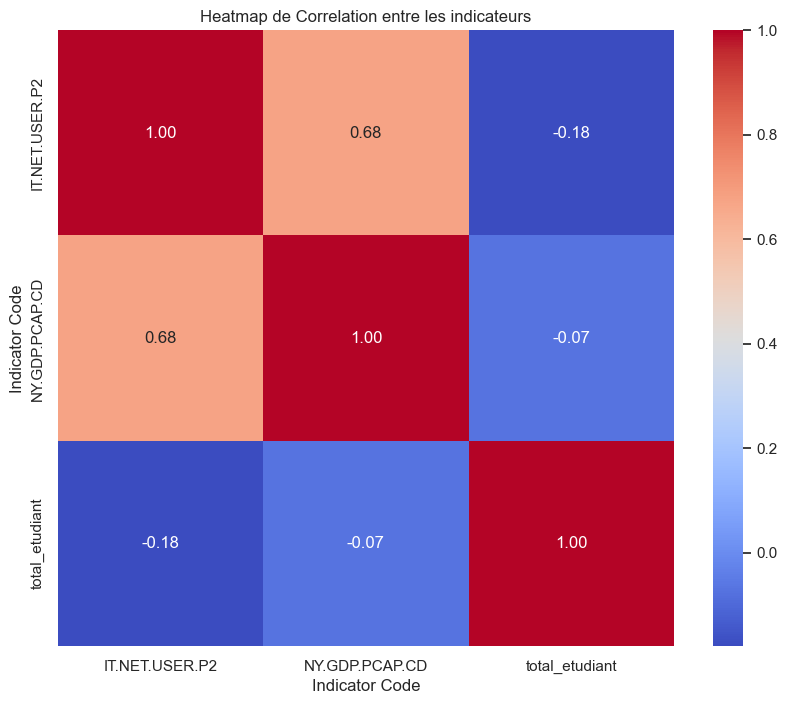

In [675]:
# Calculer la matrice de corrélation pour les colonnes normalisées
corr_matrix = dataPivot[colonnes_a_normaliser].corr()

# Créer une carte de chaleur à l'aide de Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap de Correlation entre les indicateurs')
plt.show()

- **La corrélation entre 'IT.NET.USER.P2' et 'NY.GDP.PCAP.CD' est de 0.68, ce qui indique une corrélation positive modérée.**

- **Cela signifie que dans les données analysées, il y a une tendance pour les pays ayant un taux d’utilisation d'Internet plus élevé d'avoir également un PIB par habitant plus élevé.**

- **La corrélation entre 'IT.NET.USER.P2' et 'total_etudiant' est de - 0.18, ce qui suggère qu'il n'y a pratiquement pas de corrélation linéaire entre le taux d’utilisation d'Internet et le nombre total d'étudiants.**

### <a name="C25"><font color='royalblue'>5.1 Calcul du score par pays</a>

In [676]:
# Définir les poids pour chaque indicateur
poids = {
    'IT.NET.USER.P2': 0.3,
    'NY.GDP.PCAP.CD': 0.2,
    'total_etudiant': 0.5
}

# Calculer le score pondéré
dataPivot['weighted_score'] = (dataPivot[colonnes_a_normaliser] * pd.Series(poids)).sum(axis=1)

# Triez les pays par score pondéré décroissant
dataPivot_sorted_weighted = dataPivot.sort_values(by='weighted_score', ascending=False)

# Afficher les premières lignes du DataFrame trié par score pondéré
dataPivot_sorted_weighted.head()

Indicator Code,Country Name,Region,IT.NET.USER.P2,NY.GDP.PCAP.CD,total_etudiant,weighted_score
22,China,East Asia & Pacific,0.066303,0.037432,1.000000,0.527377
55,Liechtenstein,Europe & Central Asia,0.996971,1.000000,0.000026,0.499104
66,Monaco,Europe & Central Asia,0.937149,0.963090,0.000012,0.473769
57,Luxembourg,Europe & Central Asia,0.984533,0.593536,0.000347,0.414241
101,United States,North America,0.542620,0.335274,0.359084,0.409383


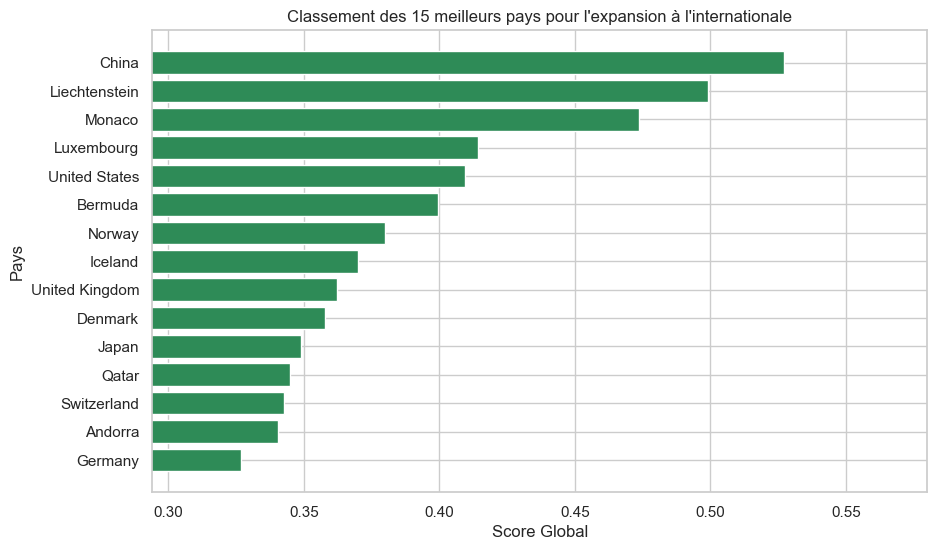

In [677]:
top_15 = dataPivot.sort_values('weighted_score', ascending=False).iloc[:15]

plt.figure(figsize=(10, 6))
# Utilisez 'Country Name' pour l'axe des y
plt.barh(top_15['Country Name'], top_15['weighted_score'], color='seagreen')
plt.xlabel('Score Global')
plt.ylabel('Pays')
plt.title("Classement des 15 meilleurs pays pour l'expansion à l'internationale")
plt.gca().invert_yaxis() # Inverser l'axe des y pour avoir le meilleur score en haut

# Ajustez l'intervalle de l'axe des x si nécessaire en fonction de vos données
plt.xlim([min(top_15['weighted_score']) * 0.9, max(top_15['weighted_score']) * 1.1])

plt.show()

- **Globalement, les résultats semblent logiques pour ces pays, en tenant compte de leurs caractéristiques économiques, démographiques et sociales.**

### <a name="C26"><font color='RoyalBlue'>5.2 Distribution par Region</a>

Text(0.5, 0.98, '')

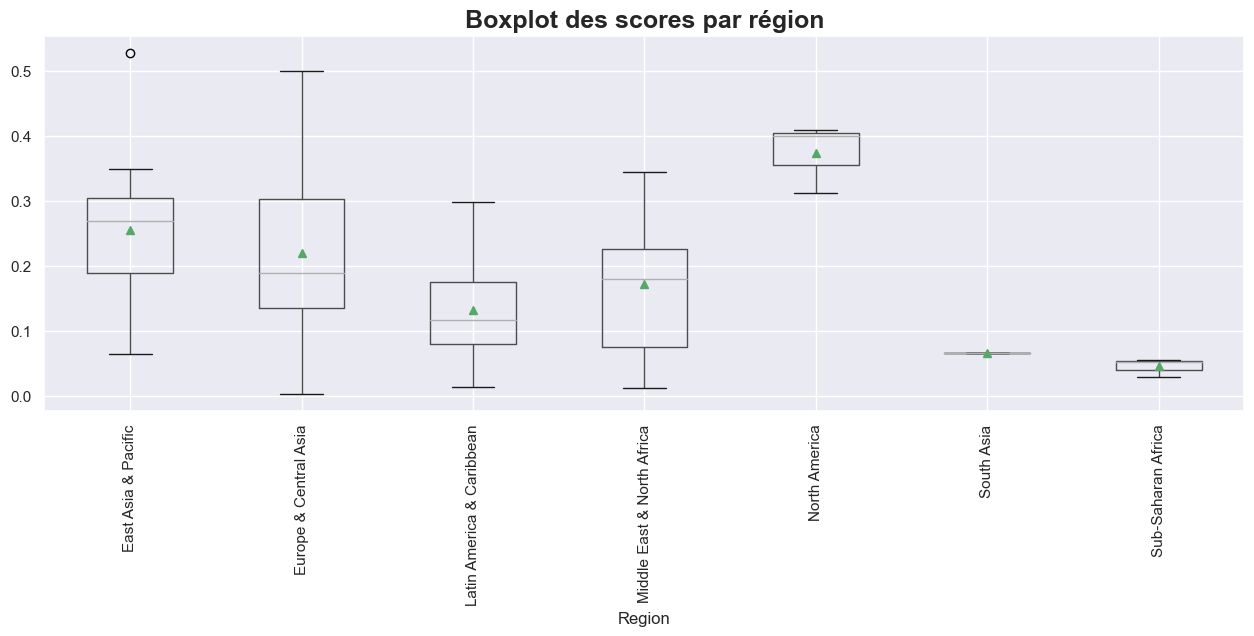

In [678]:
sns.set(style="darkgrid") #pour des graphe un peu plus beaux
dataPivot.boxplot('weighted_score', 'Region', figsize=(15, 5), rot=90, showmeans=True)
plt.title("Boxplot des scores par région", fontsize="18", fontweight='bold')
plt.suptitle('')

**Les régions North America et Europe & Europe & Central Asia semblent se démarquer des autres régions.**

### <a name="C27"><font color='RoyalBlue'>5.3 Pie plot de la répartition du potentiel par région</a>

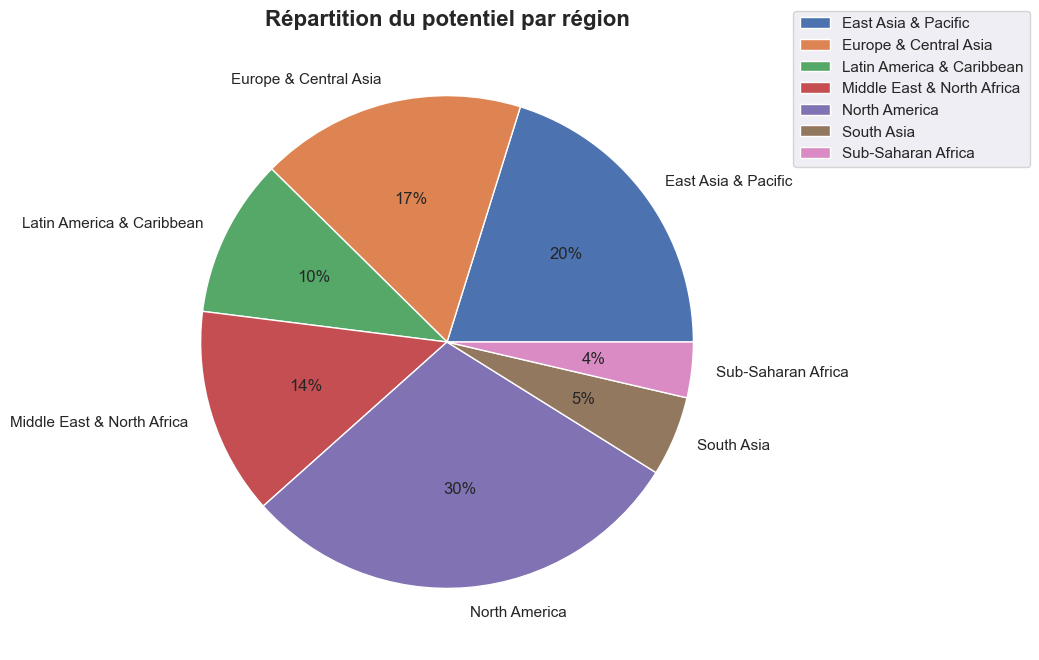

In [679]:
# Sélectionnez toutes les colonnes sauf 'Region' et convertissez-les en types numériques si nécessaire.
cols_to_include = ['IT.NET.USER.P2', 'NY.GDP.PCAP.CD', 'total_etudiant', 'weighted_score']
numeric_data = dataPivot[cols_to_include + ['Region']].apply(pd.to_numeric, errors='ignore')

# Calculer la moyenne des colonnes numériques pour chaque région
mean_scores_by_region = numeric_data.groupby('Region').mean()

# Créer un diagramme en camembert pour le score agrégé moyen
mean_scores_by_region['weighted_score'].plot.pie(autopct='%1.0f%%', figsize=(8, 8))

plt.ylabel('')  # Supprimer l'étiquette de l'axe des y
plt.title('Répartition du potentiel par région', fontsize=16, fontweight='bold')

# Déplacer la légende en dehors du graphique
plt.legend(bbox_to_anchor=(1.05, 1.05))

plt.show()

- **L'observation faite à partir du boxplot par région semble être confirmée par le présent Pie Plot**

## <a name="C28"><font color='DodgerBlue'>6. Etude des indicateurs de Projection<font></a>

In [680]:
# Création d'une liste contenant les colonnes à conserver
colsFutur = cols[:cols.index('Topic')+1] + ['2010'] + ['2015'] + cols[cols.index('2020'):]
# Création d'un nouveau DataFrame avec application des filtres
dataFutur = data[colsFutur][data['Indicator Code'].str.startswith('PRJ')]
dataFutur.tail()

,Country Name,Region,Indicator Code,Topic,2010,2015,2020,2025,2030,2035,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
886909,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.2.MF,Attainment,1406.20,1436.11,1452.30,1456.00,1406.09,1331.45,...,923.44,825.13,730.73,639.15,559.09,488.32,431.02,377.69,333.26,294.91
886912,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.NED.MF,Attainment,409.11,312.94,237.77,173.87,122.19,81.31,...,9.57,5.69,3.68,2.53,1.82,1.39,1.14,1.01,0.94,0.91
886915,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.4.MF,Attainment,304.50,370.12,448.51,528.76,614.27,706.31,...,1076.25,1166.47,1266.30,1374.29,1489.14,1611.78,1743.55,1886.91,2040.83,2202.47
886918,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.1.MF,Attainment,1614.84,1474.43,1360.77,1253.78,1124.63,995.32,...,574.00,494.23,420.47,352.09,294.10,244.68,205.47,171.39,144.86,124.17
886921,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.3.MF,Attainment,3010.47,3596.51,4207.33,4779.36,5296.82,5729.49,...,6558.41,6576.50,6572.10,6533.22,6469.39,6390.77,6303.34,6206.69,6100.56,5988.95


In [681]:
#Calculer le taux de remplissage
dataFutur['Taux de Remplissage'] = dataFutur.loc[:,'2010':'2100']\
          .notnull().sum(axis=1)/len(dataFutur.loc[:,'2010':'2100'].columns)
dataFutur.tail()

,Country Name,Region,Indicator Code,Topic,2010,2015,2020,2025,2030,2035,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Taux de Remplissage
886909,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.2.MF,Attainment,1406.20,1436.11,1452.30,1456.00,1406.09,1331.45,...,825.13,730.73,639.15,559.09,488.32,431.02,377.69,333.26,294.91,1.0
886912,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.NED.MF,Attainment,409.11,312.94,237.77,173.87,122.19,81.31,...,5.69,3.68,2.53,1.82,1.39,1.14,1.01,0.94,0.91,1.0
886915,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.4.MF,Attainment,304.50,370.12,448.51,528.76,614.27,706.31,...,1166.47,1266.30,1374.29,1489.14,1611.78,1743.55,1886.91,2040.83,2202.47,1.0
886918,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.1.MF,Attainment,1614.84,1474.43,1360.77,1253.78,1124.63,995.32,...,494.23,420.47,352.09,294.10,244.68,205.47,171.39,144.86,124.17,1.0
886921,Zimbabwe,Sub-Saharan Africa,PRJ.POP.ALL.3.MF,Attainment,3010.47,3596.51,4207.33,4779.36,5296.82,5729.49,...,6576.50,6572.10,6533.22,6469.39,6390.77,6303.34,6206.69,6100.56,5988.95,1.0


In [682]:
#Suppression des pays qui ont une moyenne de 'Taux de Remplissage' égale à 0

data_Vide = dataFutur[['Country Name','Taux de Remplissage']].groupby('Country Name').mean()
data_Vide = data_Vide[data_Vide['Taux de Remplissage'] == 0].index

dataFutur = dataFutur[~dataFutur['Country Name'].isin(data_Vide)]

In [683]:
#Suppression des 'Indicator Code' à l'exception de 'PRJ.ATT.ALL.4.MF'
dataFutur = dataFutur[dataFutur['Indicator Code'] == 'PRJ.ATT.ALL.4.MF']
dataFutur.head(2)

,Country Name,Region,Indicator Code,Topic,2010,2015,2020,2025,2030,2035,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Taux de Remplissage
98868,Albania,Europe & Central Asia,PRJ.ATT.ALL.4.MF,Attainment,0.06,0.07,0.07,0.08,0.08,0.09,...,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.2,0.21,1.0
102533,Algeria,Middle East & North Africa,PRJ.ATT.ALL.4.MF,Attainment,0.08,0.09,0.10,0.12,0.14,0.15,...,0.25,0.28,0.30,0.32,0.34,0.36,0.38,0.4,0.42,1.0


In [684]:
#Supprimer les colonnes unitules
dataFutur.drop(columns=['Indicator Code','Topic','Taux de Remplissage'], inplace=True)
dataFutur.head(2)

,Country Name,Region,2010,2015,2020,2025,2030,2035,2040,2045,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
98868,Albania,Europe & Central Asia,0.06,0.07,0.07,0.08,0.08,0.09,0.09,0.10,...,0.12,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.2,0.21
102533,Algeria,Middle East & North Africa,0.08,0.09,0.10,0.12,0.14,0.15,0.17,0.19,...,0.23,0.25,0.28,0.30,0.32,0.34,0.36,0.38,0.4,0.42


In [685]:
dataFutur.drop(columns=dataFutur.loc[:,'2035':].columns, inplace=True)
dataFutur.head()

,Country Name,Region,2010,2015,2020,2025,2030
98868,Albania,Europe & Central Asia,0.06,0.07,0.07,0.08,0.08
102533,Algeria,Middle East & North Africa,0.08,0.09,0.10,0.12,0.14
120858,Argentina,Latin America & Caribbean,0.09,0.10,0.11,0.12,0.14
124523,Armenia,Europe & Central Asia,0.15,0.17,0.17,0.18,0.19
128188,Aruba,Latin America & Caribbean,0.16,0.18,0.20,0.23,0.25


### <a name="C29"><font color='RoyalBlue'>6.1 Visualisation</a>

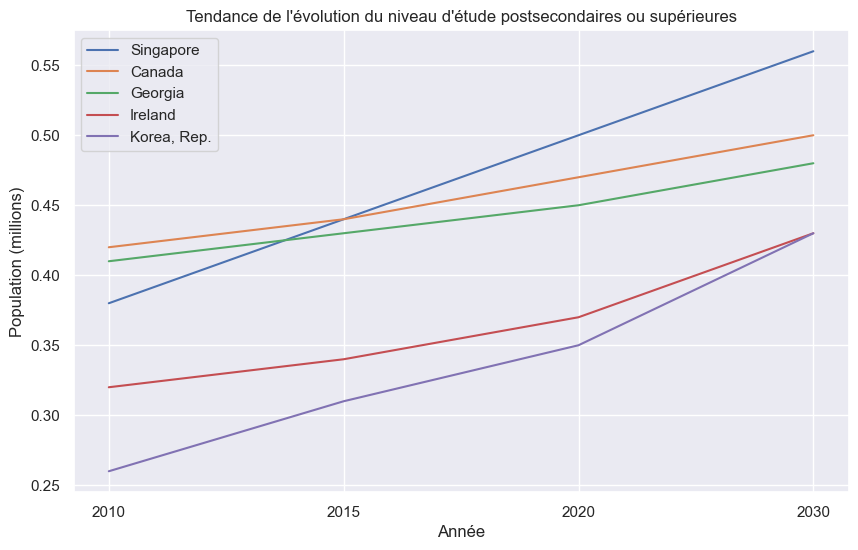

In [686]:
def plot_population_trend(data, countries):
    plt.figure(figsize=(10, 6))
    years = ['2010', '2015', '2020', '2030']
    for country_id in countries:
        country_data = data.loc[country_id] 
        country_name = country_data['Country Name']
        plt.plot(years, country_data[years].values.flatten(), label=country_name)
    plt.title("Tendance de l'évolution du niveau d'étude postsecondaires ou supérieures")
    plt.xlabel('Année')
    plt.ylabel("Population (millions)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Déterminer les 5 meilleurs pays par population en 2030 
top_countries = dataFutur.sort_values(by='2030', ascending=False).head(5).index.tolist()

# Utilisation de la fonction avec les données spécifiées
plot_population_trend(dataFutur, top_countries)

- **Le graphique nous montre la tendance de l'évolution du niveau d'étude postsecondaires ou supérieures pour plusieurs pays sur une période de temps s'étendant de 2010 à 2035.**
- **Le Singapour présente le taux de croissance le plus rapide sur cette période**
- **La Korea et l'Ireland affichent des augmentations plus modérées, mais toutes suivent une tendance à la hausse.**

## <a name="C30"><font color='DodgerBlue'>7. Conclusion<font></a>

- **Question 1: Quels sont les pays avec un fort potentiel de clients pour les services de l’entreprise ?**
**Les dix pays présentant le plus haut potentiel de clientèle, d'après leur score, sont les suivants :**
- China
- Liechtenstein
- Monaco
- Luxembourg
- Norway
- Iceland
- United Kingdom
- Denmark
- Japan
- Qatar
- Switzerland
- Andorra
- Germany

- **Question 2: Quels sont les marchés prioritaires pour l'expansion de l'entreprise ?**
- **En se basant sur le système de scoring que nous avons élaboré, les marchés cibles prioritaires pour l'entreprise devraient être ceux ayant obtenu les scores les plus élevés, à savoir :**

- **China**
- **Liechtenstein**
- **Monaco**